##Various Imports, Installs, APIs, and Drive Mounting

In [ ]:
%%capture
!pip install Anthropic
!pip install gradio
!pip install umap-learn
import nltk
nltk.download('punkt')

In [ ]:
# Imports
import os
import json
import random
import time
import re
import ast
from datetime import datetime, timedelta
from typing import List, Dict, Optional
from collections import Counter

# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image, HTML

# Machine Learning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix
from xgboost import XGBClassifier
from sklearn.manifold import TSNE

# Text and Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Deep Learning
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Transformers and NLP
from transformers import AutoTokenizer, AutoModel

# Statistical Analysis
from scipy.stats import chi2_contingency

# Others
import gradio as gr
import umap
import cv2
import textwrap as tr

pd.set_option("display.max_colwidth", None)

In [ ]:
import anthropic
client = anthropic.Anthropic(api_key=userdata.get('alex-anthropic'))

In [ ]:
%%capture
#openAI client is having issues since a recent update so reverting to an earlier httpx version
#!pip install openai==1.55.3 httpx==0.27.2 --force-reinstall --quiet
#os.kill(os.getpid(), 9)

In [ ]:
import openai
from openai import OpenAI

OPENAI_API_KEY = userdata.get('tauhid')

client = openai.Client(api_key=OPENAI_API_KEY)

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/llms_final_project')
#os.listdir()

##Some Text Preprocessing to Standardize Encoding

In [ ]:


def clean_encoding(text):
    """
    Clean text encoding and standardize special characters.
    """
    # Replace common encoding artifacts
    text = text.replace('‚Äì', '-')
    text = text.replace('‚Äú', '"')
    text = text.replace('‚Äù', '"')
    text = text.replace('‚Äô', "'")

    # Standardize to ASCII where possible, preserve common Unicode where necessary
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

def count_tokens(text):
    """
    Count tokens in text using NLTK tokenizer.
    """
    return len(word_tokenize(text))

# Read the dataset
df = pd.read_csv("final2000.csv")

# Clean encoding for all text columns
text_columns = [
    'original_review',
    'generated_claude-3-5-sonnet-20241022',
    'generated_gpt-4o-mini',
    'generated_gpt-3.5-turbo-1106'
]

for col in text_columns:
    df[col] = df[col].apply(clean_encoding)
#df.to_csv('final2000.csv', index=False)

In [ ]:
df = pd.read_csv('final2000.csv')
df.head(2)

,original_idx,original_review,generated_claude-3-5-sonnet-20241022,generated_gpt-4o-mini,generated_gpt-3.5-turbo-1106,original_tokens,claude_tokens,gpt4_tokens,gpt35_tokens
0,0,"Lately they have been trying to hock this film late-night on cable TV commercials. Don't believe the hype. I was one of the unlucky people to see this stinker in theatres. This is, in my opinion, the 3rd Worst Movie of All Time, just behind Mac & Me (#1 Worst), and Jack Frost (#2 Worst), but I must admit, they are all close and all TERRIBLE! Really, nothing of this movie is funny, or disturbing, or anything else it claims to be so don't waste your money. The only thing it is good for is giving to your worst enemy. I'm not lying about that. Someone who you would love to kill or torture would be a prime candidate for this film. It is that awful. If you don't believe me then you deserve to suffer through the misery of watching this, which I doubt you can finish. Two Thumbs Enthusiastically Down.","They've started pushing this movie on late-night TV with those desperate infomercials, but don't fall for it. I had the misfortune of catching this disaster in an actual theatre, and it ranks as my number three worst film ever, right after Mac & Me and Jack Frost - though honestly, they're all neck-and-neck in their awfulness. The movie fails completely at everything it attempts - it's not funny, not scary, not shocking, nothing. Save your money. The only conceivable use for this film would be as a form of punishment for someone you truly despise. I mean that sincerely - if you have a mortal enemy, make them watch this. If you're skeptical of my warning and decide to watch it anyway, well, you'll deserve the torment that awaits. I'd be shocked if you even make it to the end. A resounding, emphatic thumbs down.","Recently, they've been trying to peddle this film in late-night cable TV ads. Don't fall for the nonsense. I was among the unfortunate souls who caught this flop in theaters. To me, it ranks as the 3rd Worst Movie Ever, trailing only behind Mac & Me (#1 Worst) and Jack Frost (#2 Worst), though honestly, they're all pretty neck-and-neck in their horribleness! There's nothing about this movie that is remotely funny, unsettling, or anything else it purports to be, so do yourself a favor and skip it. The only thing it's really good for is handing over to someone you can't stand. I'm serious. If there's someone you genuinely want to annoy or offend, this film would be perfect for them. It's that bad. If you're skeptical, then prepare yourself for the dread of sitting through this - which, frankly, you probably won't manage to finish. Complete thumbs down from me!","They've been pushing this movie on late-night cable TV ads recently. But let me tell you, it's not worth the hype. I made the mistake of seeing it in theaters and it's without a doubt the 3rd Worst Movie of All Time in my book, just behind Mac & Me (#1 Worst) and Jack Frost (#2 Worst). Honestly, they're all on the same level of terrible. None of the movie's so-called humor or shock factor worked for me, despite what it claims to be. Save your money and steer clear. The only use for this film is to give it to your worst enemy, I'm not even kidding. If you have someone you really can't stand, they're in for a punishment with this one. I'm not exaggerating. If you don't believe me, go ahead and subject yourself to the misery of watching it - but I doubt you'll make it to the end. Two Thumbs Enthusiastically Down.",183,172,191,192
1,1,"If the scale went negative I would be happier. Seeing Sushmita Sen was nice, and Nisha Kothari has a bright future but the producer and the director ruined any and all enjoyment in this story. The choice of angles, choice of lighting and well everything distracted from trying to remember what is the story. Oh, if the songs and dances haven't caused you to rip your ears off your head, first. The film could have been made twice at 1.25 hours, and been pretty good, kinda li

In [ ]:
df.columns

Index(['original_idx', 'original_review',
       'generated_claude-3-5-sonnet-20241022', 'generated_gpt-4o-mini',
       'generated_gpt-3.5-turbo-1106', 'original_tokens', 'claude_tokens',
       'gpt4_tokens', 'gpt35_tokens'],
      dtype='object')

##Quick Exploratory Analysis of Text

<ipython-input-8-8e2bfecf0f18>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melted_data, x='Model', y='Token Count',


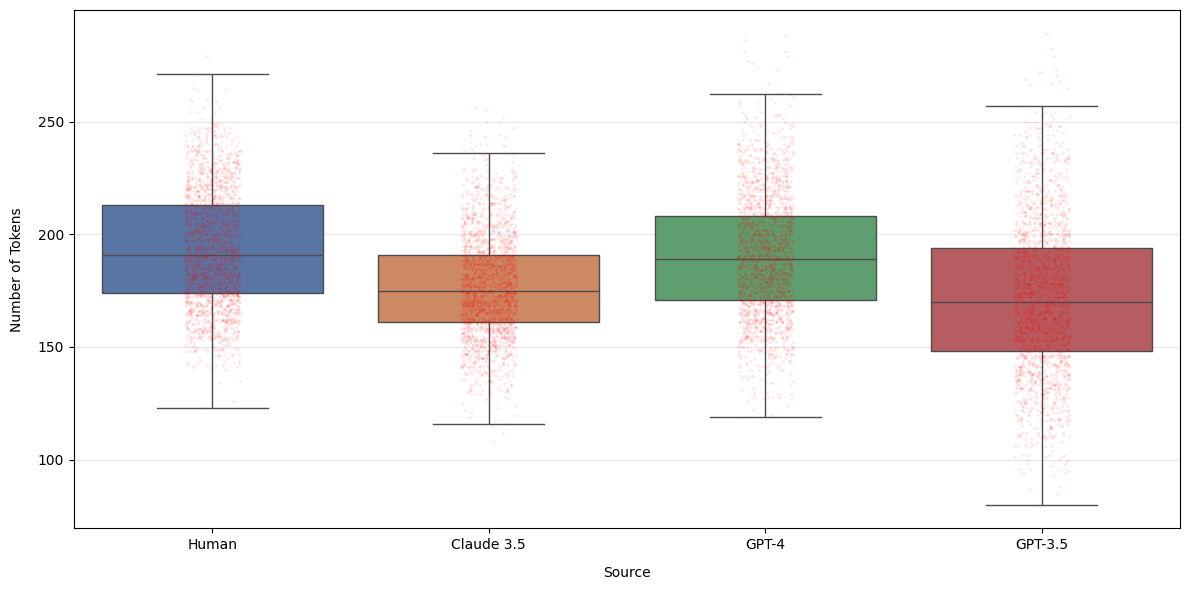

In [ ]:


# First, let's reshape the data for better seaborn plotting
length_data = pd.DataFrame({
    'Human': df['original_tokens'],
    'Claude 3.5': df['claude_tokens'],
    'GPT-4': df['gpt4_tokens'],
    'GPT-3.5': df['gpt35_tokens']
})

# Create a melted version for seaborn
melted_data = length_data.melt(var_name='Model', value_name='Token Count')

# Option 1: Enhanced boxplot with individual points
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_data, x='Model', y='Token Count',
            palette='deep',
            showfliers=False)  # hide outliers for cleaner look
sns.stripplot(data=melted_data, x='Model', y='Token Count',
             color='red', alpha=0.1, size=2)  # show individual points

plt.xlabel('Source', labelpad=10)
plt.ylabel('Number of Tokens', labelpad=10)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Error loading tokenizers/punkt/english.pickle: Package
[nltk_data]     'tokenizers/punkt/english.pickle' not found in index


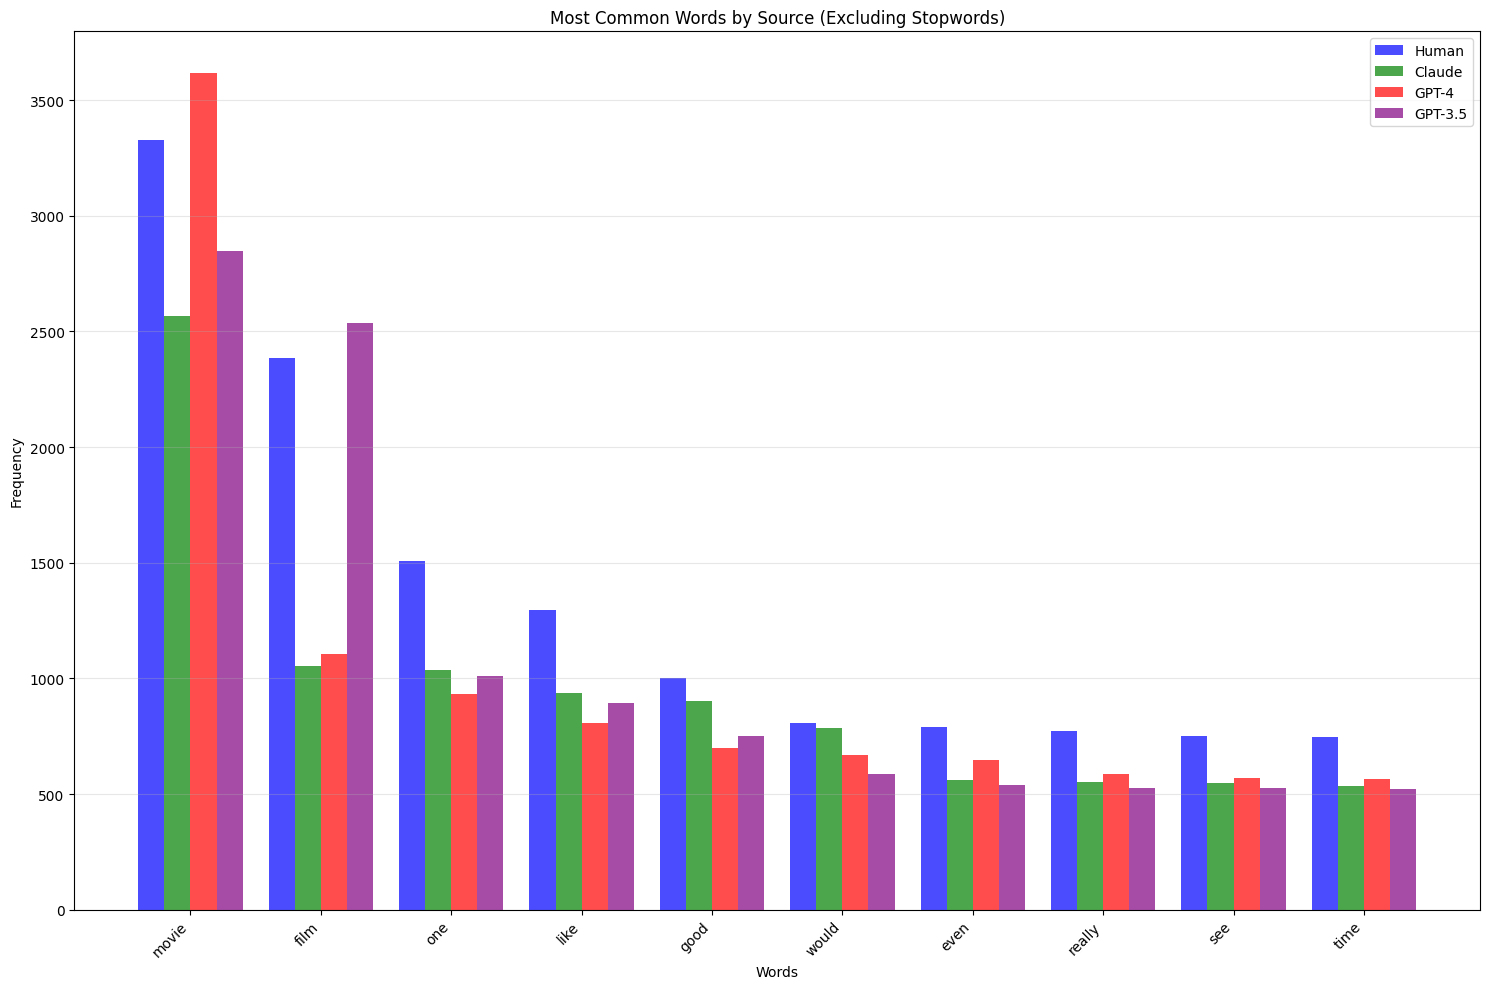


Top 10 words for each source:

Human:
  word  frequency
 movie       3326
  film       2384
   one       1507
  like       1294
  good       1003
 would        807
  even        789
really        772
   see        752
  time        746

Claude:
        word  frequency
        film       2568
        like       1052
         one       1037
       movie        936
        even        904
      though        784
   character        560
particularly        551
       story        547
       could        534

GPT-4:
 word  frequency
 film       3617
  one       1107
 like        933
movie        808
 even        701
would        670
  yet        646
films        586
might        568
could        565

GPT-3.5:
      word  frequency
      film       2850
     movie       2536
      like       1009
       one        894
      even        751
characters        588
     would        537
 character        528
   however        524
   despite        523


In [ ]:


# Download required nltk data
# Download all required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('tokenizers/punkt/english.pickle')
stop_words = set(stopwords.words('english'))

def get_word_frequencies(text_series, n_words=20):
    """Get the most common words and their frequencies from raw text."""
    all_words = []

    for text in text_series:
        # Tokenize the raw text
        tokens = word_tokenize(text.lower())
        # Filter out stopwords and non-alphabetic tokens
        words = [word for word in tokens
                if word.isalpha() and word not in stop_words]
        all_words.extend(words)

    # Count frequencies
    word_freq = Counter(all_words)
    return pd.DataFrame(word_freq.most_common(n_words), columns=['word', 'frequency'])

# Get frequencies for each source
human_freq = get_word_frequencies(df['original_review'])
claude_freq = get_word_frequencies(df['generated_claude-3-5-sonnet-20241022'])
gpt4_freq = get_word_frequencies(df['generated_gpt-4o-mini'])
gpt35_freq = get_word_frequencies(df['generated_gpt-3.5-turbo-1106'])

# Create visualization
plt.figure(figsize=(15, 10))

# Plot frequencies for each source
x = np.arange(10)  # Top 10 words
width = 0.2

plt.bar(x - 1.5*width, human_freq['frequency'][:10], width, label='Human', color='blue', alpha=0.7)
plt.bar(x - 0.5*width, claude_freq['frequency'][:10], width, label='Claude', color='green', alpha=0.7)
plt.bar(x + 0.5*width, gpt4_freq['frequency'][:10], width, label='GPT-4', color='red', alpha=0.7)
plt.bar(x + 1.5*width, gpt35_freq['frequency'][:10], width, label='GPT-3.5', color='purple', alpha=0.7)

# Customize plot
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words by Source (Excluding Stopwords)')
plt.xticks(x, human_freq['word'][:10], rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistical comparison
print("\nTop 10 words for each source:")
sources = ['Human', 'Claude', 'GPT-4', 'GPT-3.5']
frequencies = [human_freq, claude_freq, gpt4_freq, gpt35_freq]

for source, freq in zip(sources, frequencies):
    print(f"\n{source}:")
    print(freq[:10].to_string(index=False))

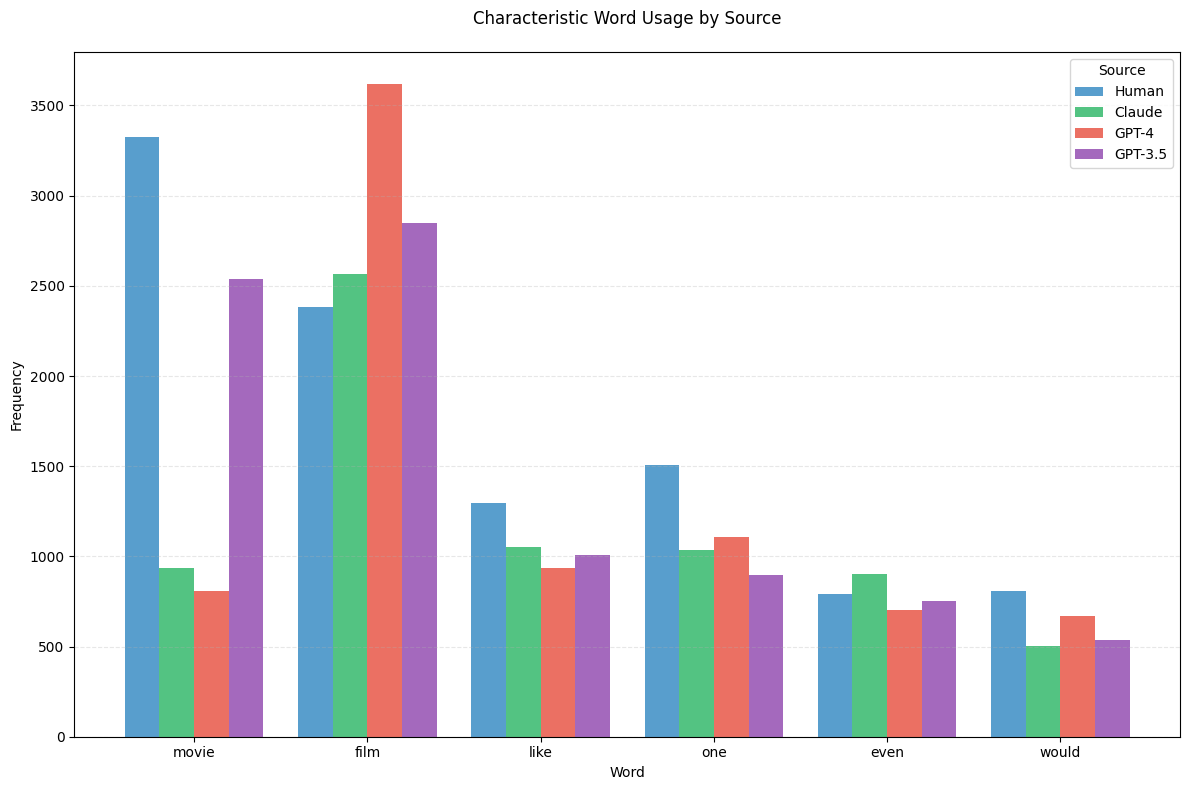

In [ ]:
def plot_word_comparison(human_freq, claude_freq, gpt4_freq, gpt35_freq, n_words=8):
    # Create figure
    plt.figure(figsize=(12, 8))

    # Select words that show interesting variation
    key_words = ['movie', 'film', 'like', 'one', 'even', 'would']

    x = np.arange(len(key_words))
    width = 0.2

    # Get frequencies for selected words
    def get_freq(freq_df, word):
        return freq_df[freq_df['word'] == word]['frequency'].iloc[0] if word in freq_df['word'].values else 0

    human_values = [get_freq(human_freq, word) for word in key_words]
    claude_values = [get_freq(claude_freq, word) for word in key_words]
    gpt4_values = [get_freq(gpt4_freq, word) for word in key_words]
    gpt35_values = [get_freq(gpt35_freq, word) for word in key_words]

    # Plot bars
    plt.bar(x - 1.5*width, human_values, width, label='Human', color='#2E86C1', alpha=0.8)
    plt.bar(x - 0.5*width, claude_values, width, label='Claude', color='#28B463', alpha=0.8)
    plt.bar(x + 0.5*width, gpt4_values, width, label='GPT-4', color='#E74C3C', alpha=0.8)
    plt.bar(x + 1.5*width, gpt35_values, width, label='GPT-3.5', color='#8E44AD', alpha=0.8)

    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.title('Characteristic Word Usage by Source', pad=20)
    plt.xticks(x, key_words, rotation=0)
    plt.legend(title='Source')

    # Add grid for readability
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    plt.tight_layout()
    return plt

# Create visualization
plot_word_comparison(human_freq, claude_freq, gpt4_freq, gpt35_freq)
plt.show()

In [ ]:


def test_word_significance(human_freq, claude_freq, gpt4_freq, gpt35_freq, word_list):
    """
    Perform chi-square test for word frequency differences across sources.
    """
    def get_freq(freq_df, word):
        return freq_df[freq_df['word'] == word]['frequency'].iloc[0] if word in freq_df['word'].values else 0

    results = []
    for word in word_list:
        # Create contingency table
        obs = np.array([
            [get_freq(human_freq, word),
             sum(human_freq['frequency']) - get_freq(human_freq, word)],
            [get_freq(claude_freq, word),
             sum(claude_freq['frequency']) - get_freq(claude_freq, word)],
            [get_freq(gpt4_freq, word),
             sum(gpt4_freq['frequency']) - get_freq(gpt4_freq, word)],
            [get_freq(gpt35_freq, word),
             sum(gpt35_freq['frequency']) - get_freq(gpt35_freq, word)]
        ])

        # Perform chi-square test
        chi2, p_value, dof, expected = chi2_contingency(obs)

        # Calculate effect size (Cramer's V)
        n = obs.sum()
        min_dim = min(obs.shape) - 1
        cramer_v = np.sqrt(chi2 / (n * min_dim))

        results.append({
            'word': word,
            'chi2': chi2,
            'p_value': p_value,
            'cramer_v': cramer_v
        })

    return pd.DataFrame(results)

# Test key words
key_words = ['movie', 'film', 'like', 'one', 'even', 'would', 'yet', 'however', 'despite']
significance_results = test_word_significance(human_freq, claude_freq, gpt4_freq, gpt35_freq, key_words)

# Sort by effect size and print results
significance_results = significance_results.sort_values('cramer_v', ascending=False)
print("\nStatistical Significance Results:")
print(significance_results.round(4))


Statistical Significance Results:
      word       chi2  p_value  cramer_v
6      yet  2110.8254   0.0000    0.1819
0    movie  1861.9529   0.0000    0.1709
8  despite  1677.3378   0.0000    0.1622
7  however  1139.8926   0.0000    0.1337
1     film   781.8706   0.0000    0.1107
4     even    90.1962   0.0000    0.0376
3      one    53.7297   0.0000    0.0290
5    would    27.3343   0.0000    0.0207
2     like    16.6583   0.0008    0.0162


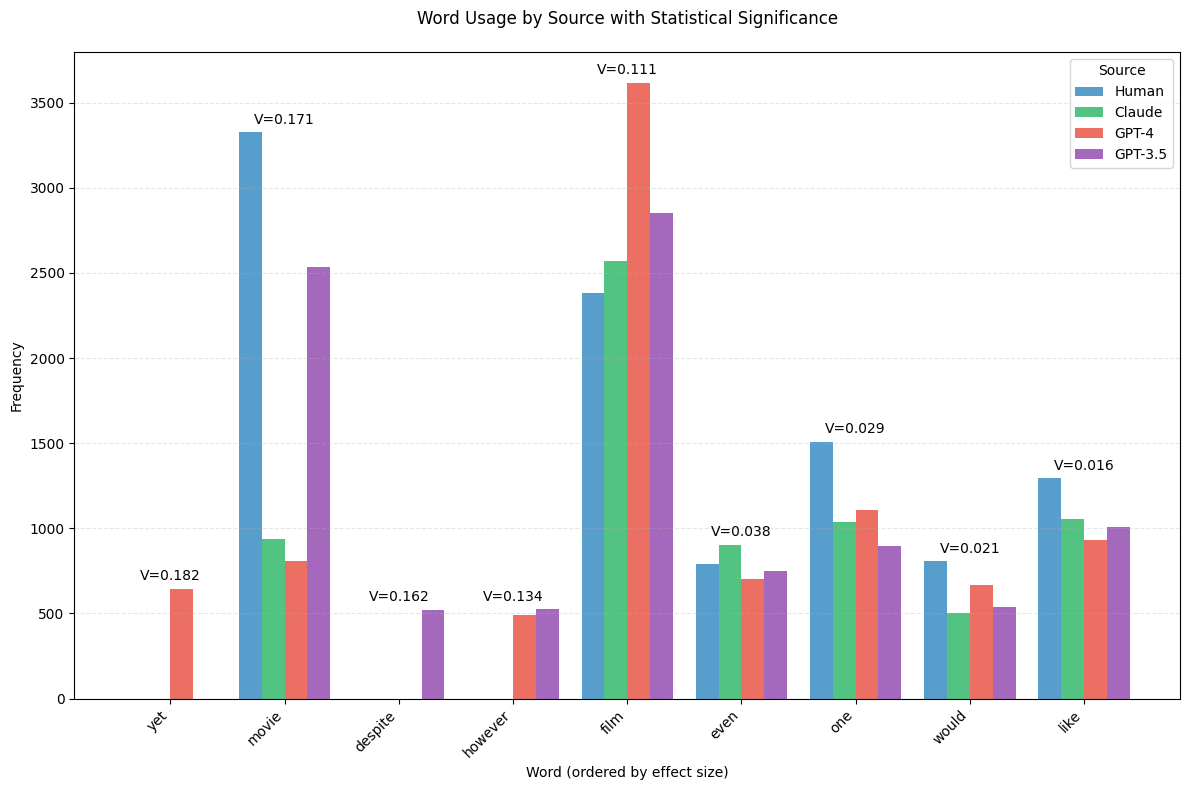

In [ ]:
def plot_word_comparison_with_significance(human_freq, claude_freq, gpt4_freq, gpt35_freq, significance_results):
    plt.figure(figsize=(12, 8))

    # Get words sorted by Cramer's V
    words = significance_results['word'].tolist()
    x = np.arange(len(words))
    width = 0.2

    def get_freq(freq_df, word):
        return freq_df[freq_df['word'] == word]['frequency'].iloc[0] if word in freq_df['word'].values else 0

    # Get frequencies
    human_values = [get_freq(human_freq, word) for word in words]
    claude_values = [get_freq(claude_freq, word) for word in words]
    gpt4_values = [get_freq(gpt4_freq, word) for word in words]
    gpt35_values = [get_freq(gpt35_freq, word) for word in words]

    # Plot bars
    bars1 = plt.bar(x - 1.5*width, human_values, width, label='Human', color='#2E86C1', alpha=0.8)
    bars2 = plt.bar(x - 0.5*width, claude_values, width, label='Claude', color='#28B463', alpha=0.8)
    bars3 = plt.bar(x + 0.5*width, gpt4_values, width, label='GPT-4', color='#E74C3C', alpha=0.8)
    bars4 = plt.bar(x + 1.5*width, gpt35_values, width, label='GPT-3.5', color='#8E44AD', alpha=0.8)

    # Add Cramer's V values above bars
    for i, v in enumerate(significance_results['cramer_v']):
        plt.text(i, max([human_values[i], claude_values[i], gpt4_values[i], gpt35_values[i]]) + 50,
                f'V={v:.3f}', ha='center')

    plt.xlabel('Word (ordered by effect size)')
    plt.ylabel('Frequency')
    plt.title('Word Usage by Source with Statistical Significance', pad=20)
    plt.xticks(x, words, rotation=45, ha='right')
    plt.legend(title='Source')

    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    return plt

# Create visualization
plot_word_comparison_with_significance(human_freq, claude_freq, gpt4_freq, gpt35_freq, significance_results)
plt.show()

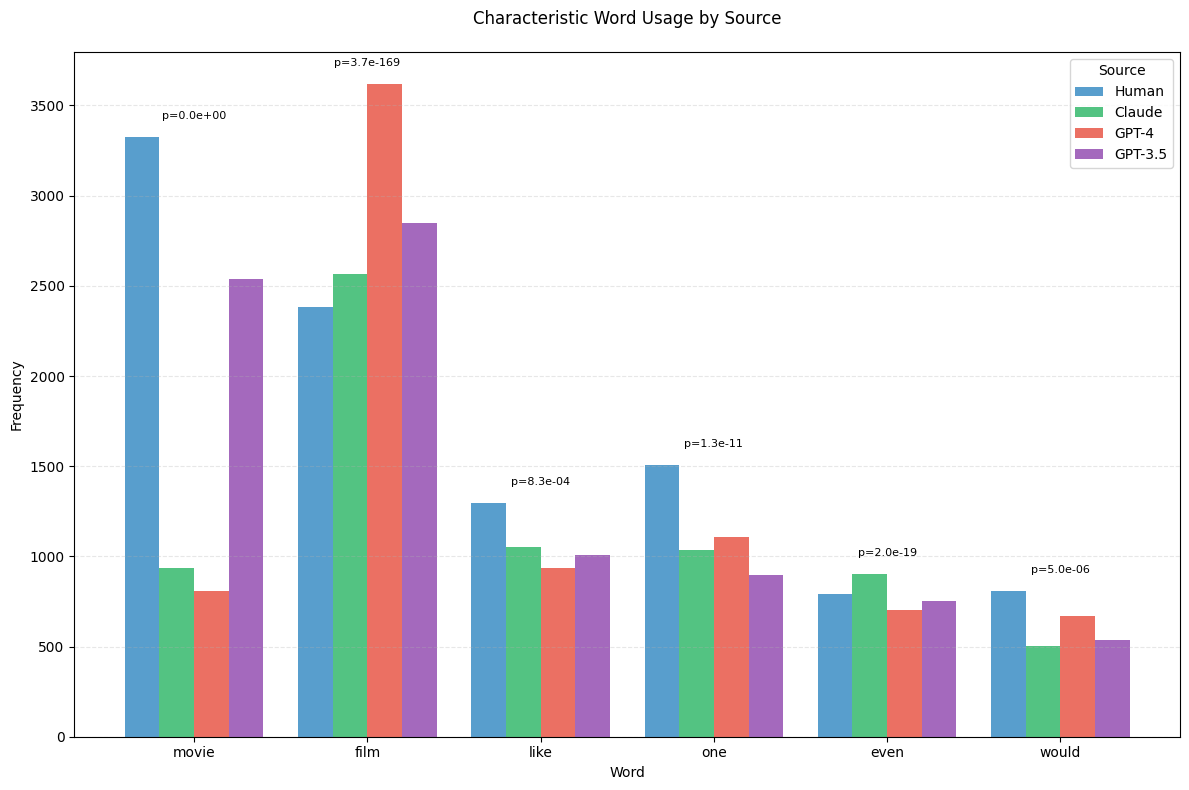

In [ ]:
#putting plots together
def plot_word_comparison(human_freq, claude_freq, gpt4_freq, gpt35_freq, significance_results, n_words=8):
    # Create figure
    plt.figure(figsize=(12, 8))

    # Select words that show interesting variation
    key_words = ['movie', 'film', 'like', 'one', 'even', 'would']

    x = np.arange(len(key_words))
    width = 0.2

    # Get frequencies for selected words
    def get_freq(freq_df, word):
        return freq_df[freq_df['word'] == word]['frequency'].iloc[0] if word in freq_df['word'].values else 0

    human_values = [get_freq(human_freq, word) for word in key_words]
    claude_values = [get_freq(claude_freq, word) for word in key_words]
    gpt4_values = [get_freq(gpt4_freq, word) for word in key_words]
    gpt35_values = [get_freq(gpt35_freq, word) for word in key_words]

    # Plot bars
    plt.bar(x - 1.5*width, human_values, width, label='Human', color='#2E86C1', alpha=0.8)
    plt.bar(x - 0.5*width, claude_values, width, label='Claude', color='#28B463', alpha=0.8)
    plt.bar(x + 0.5*width, gpt4_values, width, label='GPT-4', color='#E74C3C', alpha=0.8)
    plt.bar(x + 1.5*width, gpt35_values, width, label='GPT-3.5', color='#8E44AD', alpha=0.8)

    # Add p-values above each word
    for i, word in enumerate(key_words):
        p_value = significance_results[significance_results['word'] == word]['p_value'].iloc[0]
        max_height = max(human_values[i], claude_values[i], gpt4_values[i], gpt35_values[i])
        plt.text(i, max_height + 100, f'p={p_value:.1e}', ha='center', fontsize=8)

    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.title('Characteristic Word Usage by Source', pad=20)
    plt.xticks(x, key_words, rotation=0)
    plt.legend(title='Source')

    # Add grid for readability
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    plt.tight_layout()
    return plt

# Create visualization
plot_word_comparison(human_freq, claude_freq, gpt4_freq, gpt35_freq, significance_results)
plt.show()

# Can LLMs recognize their own text?

##Making a test set for this task

In [ ]:


def create_test_set(df, n_samples=200, random_seed=42):
    """
    Create a fixed test set with balanced samples from each source.

    Args:
        df: Original DataFrame with all reviews
        n_samples: Total number of samples desired
        random_seed: For reproducibility

    Returns:
        DataFrame with test samples and their true sources
    """
    np.random.seed(random_seed)
    random.seed(random_seed)

    # Calculate samples per source (we want equal representation)
    samples_per_source = n_samples // 4  # 4 sources: Human, Claude, GPT-4, GPT-3.5

    # Randomly select row indices
    row_indices = np.random.choice(df.index, size=samples_per_source, replace=False)

    test_samples = []

    # For each selected row index, get all four versions of the review
    for idx in row_indices:
        row = df.loc[idx]

        # Add human original
        test_samples.append({
            'original_idx': row.name,
            'text': row['original_review'],
            'true_source': 'Human',
            'test_sample_idx': len(test_samples)
        })

        # Add Claude version
        test_samples.append({
            'original_idx': row.name,
            'text': row['generated_claude-3-5-sonnet-20241022'],
            'true_source': 'Claude',
            'test_sample_idx': len(test_samples)
        })

        # Add GPT-4 version
        test_samples.append({
            'original_idx': row.name,
            'text': row['generated_gpt-4o-mini'],
            'true_source': 'GPT-4',
            'test_sample_idx': len(test_samples)
        })

        # Add GPT-3.5 version
        test_samples.append({
            'original_idx': row.name,
            'text': row['generated_gpt-3.5-turbo-1106'],
            'true_source': 'GPT-3.5',
            'test_sample_idx': len(test_samples)
        })

    # Create DataFrame and shuffle the samples
    test_df = pd.DataFrame(test_samples)
    test_df = test_df.sample(frac=1, random_state=random_seed).reset_index(drop=True)

    # Verify balance
    print("\nDistribution of sources in test set:")
    print(test_df['true_source'].value_counts())

    # Save the test set
    test_df.to_csv('model_classification_test_set.csv', index=False)

    return test_df

# Create the test set
test_df = create_test_set(df, n_samples=400)


Distribution of sources in test set:
true_source
Claude     100
Human      100
GPT-4      100
GPT-3.5    100
Name: count, dtype: int64


In [ ]:
test_df = pd.read_csv('model_classification_test_set.csv')
test_df.head(2)

,original_idx,text,true_source,test_sample_idx
0,1450,"Just caught an early showing of this film. While I haven't delved into the source material myself, I'd heard plenty of praise for it beforehand. The film was genuinely remarkable and deeply affecting. It takes you through a full spectrum of emotions, and you really find yourself invested in every character. Shaun Toub delivered an exceptional performance that's quite different from what we usually see from him - particularly impressive if you understand Persian/Dari. It's worth mentioning that the original author, Khaled Hosseini, gave it his full endorsement, which is pretty rare for book adaptations. He was reportedly moved to tears even after multiple viewings. The opening sequence deserves special mention - the way they incorporated Persian calligraphy into the credits was stunning and innovative. Though some of the translations could have been more precise, the film as a whole was outstanding.",Claude,209
1,1453,"The one who says that Lucio Fulci is not one of the most important names in the history of splatter is probably mad.The Italian director is a legend among hardcore-horror fans,and his work exceeds the barriers of the genre(who can forgot his western,crime or fantasy flicks).This is probably his goriest film,and unfortunately one the last.A horror director(Fulci as himself) starts hallucinating about gruesome murders.He goes to a psychiatrist,who makes him believe he is the criminal.In this time,the doctor begins a long chain of serial crimes.With such a plot,the movie should have been filled with something.And there are roting corpses,crashed or melted heads,stabbings,decapitations,chainsaw dismemberment and many others.Kind of boring sometimes,the film is saved by the excessive violence that will definitely please the gore addicts.",Human,280


##Claude does the task...

In [ ]:
def classify_reviews_claude(test_df, model_name):
    """
    Have Claude classify the pre-sampled test set reviews.

    Args:
        test_df: DataFrame containing the test set
        model_name: Name of the Claude model to use
    """
    results = []

    instructions = '''You will be shown a movie review. In the set of reviews you'll analyze, exactly 25% were written by humans, 25% by Claude, 25% by GPT-4, and 25% by GPT-3.5.

Your task is to identify the most likely source of each review. You must respond with exactly one of these four options:
"Human"
"Claude"
"GPT-4"
"GPT-3.5"

Important: Return ONLY one of these four options with no additional commentary or explanations.'''

    for idx in tqdm(test_df.index):
        try:
            row = test_df.loc[idx]
            review_text = row['text']
            true_source = row['true_source']

            # Combine instructions and review for Claude
            combined_prompt = f"{instructions}\n\nText to classify:\n{review_text}"

            # Get Claude's classification
            completion = client.messages.create(
                model=model_name,
                max_tokens=10,
                temperature=0,
                messages=[
                    {"role": "user", "content": combined_prompt}
                ]
            )

            # Extract the classification from Claude's response
            predicted_source = completion.content[0].text.strip().replace('"', '')

            # Store result
            result = {
                'test_sample_idx': row['test_sample_idx'],
                'original_idx': row['original_idx'],
                'text': review_text,
                'true_source': true_source,
                'predicted_source': predicted_source,
                'correct': true_source == predicted_source,
                'timestamp': datetime.now().isoformat()
            }

            results.append(result)

            # Save intermediate results every 20 samples
            if len(results) % 20 == 0:
                interim_df = pd.DataFrame(results)
                interim_df.to_csv(f'classification_results_{model_name}_{len(results)}.csv', index=False)

            # Add a small delay to avoid rate limits
            time.sleep(0.1)

        except Exception as e:
            print(f"Error processing review {idx}: {str(e)}")
            continue

    # Create final results DataFrame
    final_df = pd.DataFrame(results)

    # Calculate and print summary statistics
    accuracy = (final_df['correct'].mean() * 100)
    confusion_matrix = pd.crosstab(
        final_df['true_source'],
        final_df['predicted_source'],
        margins=True
    )
    accuracy_by_source = final_df.groupby('true_source')['correct'].mean() * 100

    print(f"\nOverall Accuracy: {accuracy:.2f}%")
    print("\nAccuracy by Source:")
    print(accuracy_by_source)
    print("\nConfusion Matrix:")
    print(confusion_matrix)

    # Save final results
    final_df.to_csv(f'final_classification_results_{model_name}.csv', index=False)

    return final_df

# Usage:
claude_results = classify_reviews_claude(test_df, 'claude-3-5-sonnet-20241022')

100%|██████████| 400/400 [08:42<00:00,  1.31s/it]


Overall Accuracy: 32.50%

Accuracy by Source:
true_source
Claude      1.0
GPT-3.5    21.0
GPT-4      10.0
Human      98.0
Name: correct, dtype: float64

Confusion Matrix:
predicted_source  Claude  GPT-3.5  GPT-4  Human  All
true_source                                         
Claude                 1        7     15     77  100
GPT-3.5                1       21     12     66  100
GPT-4                  0       18     10     72  100
Human                  0        2      0     98  100
All                    2       48     37    313  400


##What about GPT-4o mini?

In [ ]:
test_df = pd.read_csv('model_classification_test_set.csv')

def get_completion(prompt, instructions, client, model="gpt-4o",
                   output_type = 'text'):
  '''Get a text completion from the OpenAI API'''
  completion = client.chat.completions.create(
                model=model,
                response_format={ "type": output_type},
                messages=[
                  {"role": "system", "content": instructions},
                  {"role": "user", "content": prompt}
                ]
              )
  response =completion.choices[0].message.content

  return response

def classify_reviews_gpt(test_df, model_name):
    """
    Have GPT classify the pre-sampled test set reviews.

    Args:
        test_df: DataFrame containing the test set
        model_name: Name of the GPT model to use
    """
    client = OpenAI()
    results = []

    instructions = '''You will be shown a movie review. In the set of reviews you'll analyze, exactly 25% were written by humans, 25% by Claude, 25% by GPT-4, and 25% by GPT-3.5.

Your task is to identify the most likely source of each review. You must respond with exactly one of these four options:
"Human"
"Claude"
"GPT-4"
"GPT-3.5"

Important: Return ONLY one of these four options with no additional commentary or explanations.'''

    for idx in tqdm(test_df.index):
        try:
            row = test_df.loc[idx]
            review_text = row['text']
            true_source = row['true_source']

            # Get GPT's classification
            response = client.chat.completions.create(
                model=model_name,
                messages=[
                    {"role": "system", "content": instructions},
                    {"role": "user", "content": review_text}
                ],
                temperature=0,
                max_tokens=10
            )

            predicted_source = response.choices[0].message.content.strip().replace('"', '')

            # Store result
            result = {
                'test_sample_idx': row['test_sample_idx'],
                'original_idx': row['original_idx'],
                'text': review_text,
                'true_source': true_source,
                'predicted_source': predicted_source,
                'correct': true_source == predicted_source,
                'timestamp': datetime.now().isoformat()
            }

            results.append(result)

            # Save intermediate results every 20 samples
            if len(results) % 20 == 0:
                interim_df = pd.DataFrame(results)
                interim_df.to_csv(f'classification_results_{model_name}_{len(results)}.csv', index=False)

            # Add a small delay to avoid rate limits
            time.sleep(0.1)

        except Exception as e:
            print(f"Error processing review {idx}: {str(e)}")
            continue

    # Create final results DataFrame
    final_df = pd.DataFrame(results)

    # Calculate and print summary statistics
    accuracy = (final_df['correct'].mean() * 100)
    confusion_matrix = pd.crosstab(
        final_df['true_source'],
        final_df['predicted_source'],
        margins=True
    )
    accuracy_by_source = final_df.groupby('true_source')['correct'].mean() * 100

    print(f"\nOverall Accuracy: {accuracy:.2f}%")
    print("\nAccuracy by Source:")
    print(accuracy_by_source)
    print("\nConfusion Matrix:")
    print(confusion_matrix)

    # Save final results
    final_df.to_csv(f'final_classification_results_{model_name}.csv', index=False)

    return final_df

# Usage:
# For GPT-4
gpt4_results = classify_reviews_gpt(test_df, 'gpt-4o-mini')

100%|██████████| 400/400 [04:26<00:00,  1.50it/s]


Overall Accuracy: 25.25%

Accuracy by Source:
true_source
Claude      1.0
GPT-3.5     0.0
GPT-4       3.0
Human      97.0
Name: correct, dtype: float64

Confusion Matrix:
predicted_source  Claude  GPT-3.5  GPT-4  Human  All
true_source                                         
Claude                 1        0      2     97  100
GPT-3.5                2        0      4     94  100
GPT-4                  0        0      3     97  100
Human                  2        1      0     97  100
All                    5        1      9    385  400


##And GPT-3.5t?

In [ ]:
gpt35_results = classify_reviews_gpt(test_df, 'gpt-3.5-turbo-1106')

100%|██████████| 400/400 [04:33<00:00,  1.46it/s]


Overall Accuracy: 25.00%

Accuracy by Source:
true_source
Claude      0.0
GPT-3.5    51.0
GPT-4      35.0
Human      14.0
Name: correct, dtype: float64

Confusion Matrix:
predicted_source  GPT-3.5  GPT-4  Human  All
true_source                                 
Claude                 50     39     11  100
GPT-3.5                51     39     10  100
GPT-4                  52     35     13  100
Human                  80      6     14  100
All                   233    119     48  400


##Visualizing results of LLM-self recognition

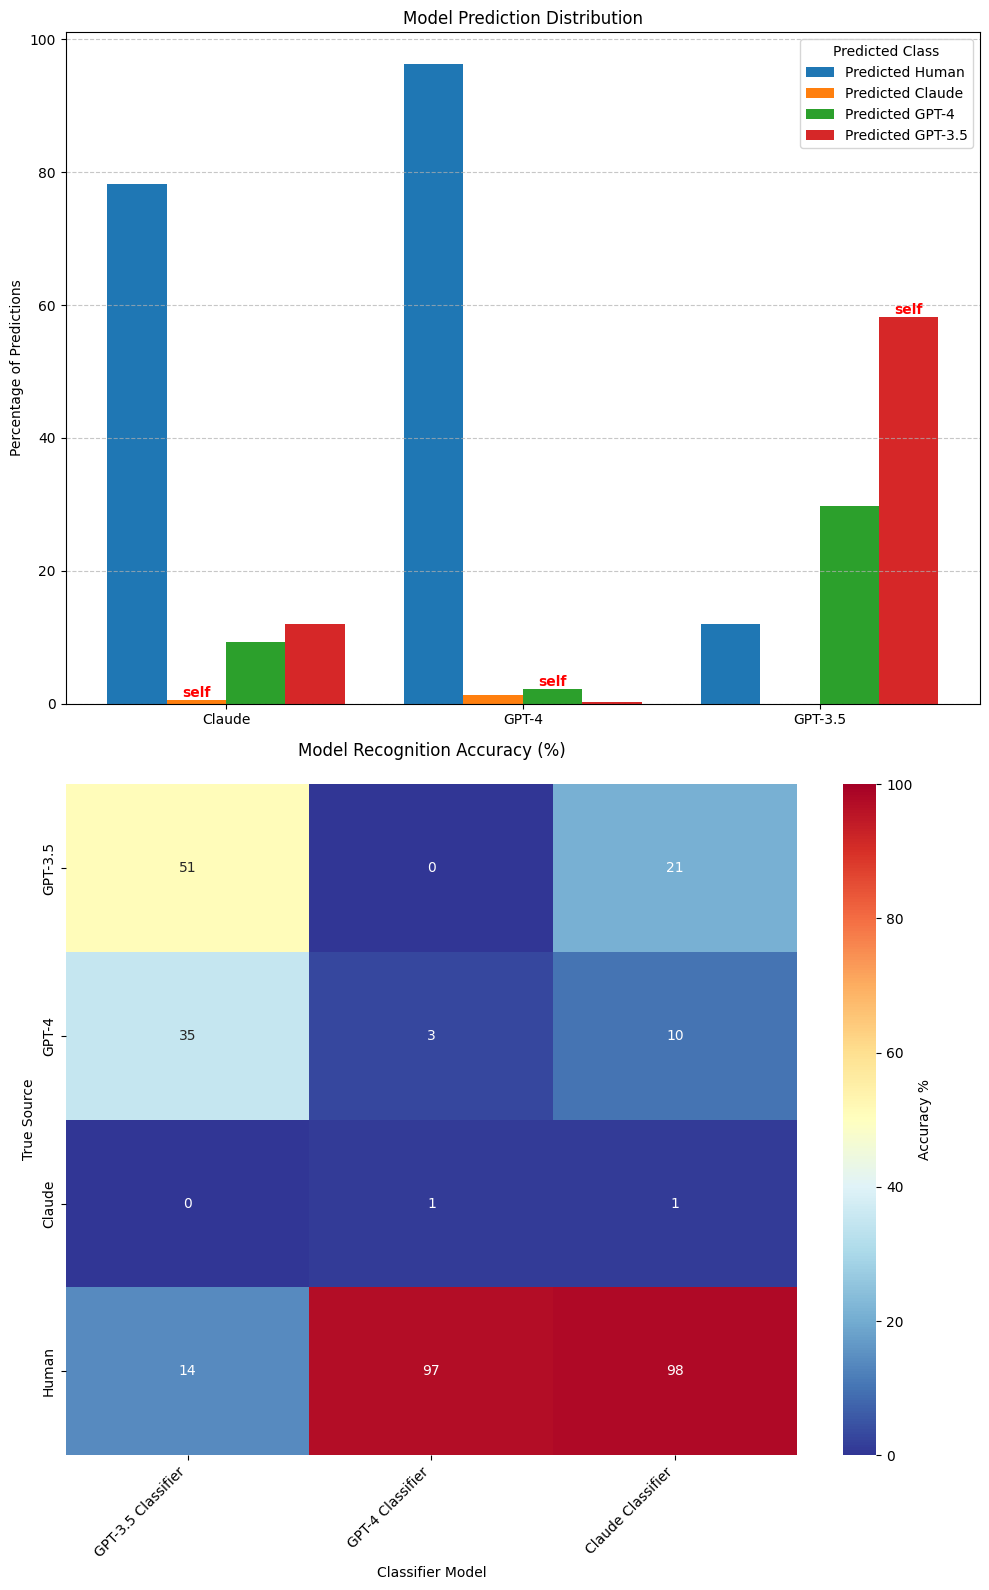

In [ ]:
claude_results = pd.read_csv('final_classification_results_claude-3-5-sonnet-20241022.csv')
gpt4_results = pd.read_csv('final_classification_results_gpt-4o-mini.csv')
gpt35_results = pd.read_csv('final_classification_results_gpt-3.5-turbo-1106.csv')

def create_improved_visualizations(claude_results, gpt4_results, gpt35_results):
    # Change subplot layout from (1, 2) to (2, 1)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 16))

    # Rest of the code remains the same, just with adjusted figure size
    classifiers = ['Claude', 'GPT-4', 'GPT-3.5']
    predictions = ['Human', 'Claude', 'GPT-4', 'GPT-3.5']

    data = {
        'Claude': claude_results['predicted_source'].value_counts(normalize=True),
        'GPT-4': gpt4_results['predicted_source'].value_counts(normalize=True),
        'GPT-3.5': gpt35_results['predicted_source'].value_counts(normalize=True)
    }

    x = np.arange(len(classifiers))
    width = 0.2

    for i, pred_class in enumerate(predictions):
        pred_values = [data[model].get(pred_class, 0) * 100 for model in classifiers]
        offset = (i - 1.5) * width
        bars = ax1.bar(x + offset, pred_values, width, label=f'Predicted {pred_class}')

        for j, (model, val) in enumerate(zip(classifiers, pred_values)):
            if model == pred_class:
                ax1.text(j + offset, val, 'self',
                        ha='center', va='bottom',
                        color='red', fontweight='bold')

    ax1.set_ylabel('Percentage of Predictions')
    ax1.set_title('Model Prediction Distribution')
    ax1.set_xticks(x)
    ax1.set_xticklabels(classifiers)
    ax1.legend(title='Predicted Class')
    ax1.grid(axis='y', linestyle='--', alpha=0.7)

    # Heatmap
    recognition_data = {
        'GPT-3.5 Classifier': [51, 35, 0, 14],
        'GPT-4 Classifier': [0, 3, 1, 97],
        'Claude Classifier': [21, 10, 1, 98]
    }

    recognition_df = pd.DataFrame(
        recognition_data,
        index=['GPT-3.5', 'GPT-4', 'Claude', 'Human']
    )

    sns.heatmap(recognition_df,
                annot=True,
                fmt='.0f',
                cmap='RdYlBu_r',
                ax=ax2,
                cbar_kws={'label': 'Accuracy %'},
                vmin=0,
                vmax=100,
                center=50)

    ax2.set_title('Model Recognition Accuracy (%)', pad=20)
    ax2.set_xlabel('Classifier Model')
    ax2.set_ylabel('True Source')
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    return fig

# Create visualizations
fig = create_improved_visualizations(claude_results, gpt4_results, gpt35_results)
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

#Embedding with BERT-Large

In [ ]:


def mean_pooling(model_output, attention_mask):
    """
    Perform mean pooling on token embeddings.
    Using mean pooling instead of just [CLS] token as it often performs better.
    """
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def prepare_data(df, batch_size=32):
    """
    Create embeddings using BERT-large.

    Args:
        df: DataFrame containing the review texts
        batch_size: Number of texts to process at once
    """
    # Initialize BERT-large model and tokenizer
    tokenizer = AutoTokenizer.from_pretrained('bert-large-uncased')
    model = AutoModel.from_pretrained('bert-large-uncased')

    # Move model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    # Gather all texts
    texts = {
        'human': df['original_review'].tolist(),
        'gpt4': df['generated_gpt-4o-mini'].tolist(),
        'claude': df['generated_claude-3-5-sonnet-20241022'].tolist(),
        'gpt3.5turbo': df['generated_gpt-3.5-turbo-1106'].tolist(),
    }

    # Create embeddings
    embeddings = {}
    labels = []
    all_embeddings = []

    for label, text_list in texts.items():
        print(f"Generating embeddings for {label} texts...")
        text_embeddings = []

        # Process in batches
        for i in tqdm(range(0, len(text_list), batch_size)):
            batch_texts = text_list[i:i + batch_size]

            # Convert any non-string elements to strings and handle None values
            batch_texts = [str(text) if text is not None else "" for text in batch_texts]

            # Tokenize texts
            encoded_input = tokenizer(
                batch_texts,
                padding=True,
                truncation=True,
                max_length=512,
                return_tensors='pt'
            )

            # Move input to GPU
            encoded_input = {k: v.to(device) for k, v in encoded_input.items()}

            # Compute token embeddings
            with torch.no_grad():
                model_output = model(**encoded_input)

            # Perform mean pooling
            batch_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

            text_embeddings.append(batch_embeddings.cpu().numpy())

        # Concatenate all batches
        emb = np.vstack(text_embeddings)
        embeddings[label] = emb
        all_embeddings.append(emb)
        labels.extend([label] * len(text_list))

    # Stack all embeddings
    X = np.vstack(all_embeddings)

    print(f"Final embedding shape: {X.shape}")  # Should be (n_samples, 1024)
    return X, labels, embeddings

In [ ]:
X, labels, embeddings = prepare_data(df)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Generating embeddings for human texts...


100%|██████████| 63/63 [00:22<00:00,  2.85it/s]


Generating embeddings for gpt4 texts...


100%|██████████| 63/63 [00:21<00:00,  2.92it/s]


Generating embeddings for claude texts...


100%|██████████| 63/63 [00:19<00:00,  3.20it/s]


Generating embeddings for gpt3.5turbo texts...


100%|██████████| 63/63 [00:20<00:00,  3.03it/s]

Final embedding shape: (8000, 1024)


In [ ]:
# Create the base DataFrame with embeddings
embedding_cols = [f'dim_{i}' for i in range(X.shape[1])]
embeddings_df = pd.DataFrame(X, columns=embedding_cols)

# Add the labels
embeddings_df['source'] = labels

# Add original indices
# Since we process texts in order (human, gpt4, claude, gpt3.5turbo)
# and each has the same number of samples, we can reconstruct the original indices
samples_per_class = len(df)  # Should be 2000 in your case
original_indices = []

for i in range(4):  # 4 classes
    original_indices.extend(df.index[:samples_per_class])

embeddings_df['original_idx'] = original_indices

# Save to disk
#embeddings_df.to_csv('final2000_embeddings.csv')

In [ ]:
embeddings_df = pd.read_csv('final2000_embeddings.csv')
embeddings_df.head()

,Unnamed: 0,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,...,dim_1016,dim_1017,dim_1018,dim_1019,dim_1020,dim_1021,dim_1022,dim_1023,source,original_idx
0,0,-0.183538,-0.200245,-0.366503,-0.203206,-0.022878,0.043216,0.220517,0.205977,0.037056,...,-0.333712,-0.072254,0.176854,0.328286,0.141802,-0.231668,-0.001377,0.004097,human,0
1,1,-0.219603,-0.126190,-0.270172,-0.242370,-0.292961,-0.208295,0.252820,0.119645,0.167602,...,-0.156718,-0.092659,-0.018676,0.362246,-0.003720,-0.359569,-0.025589,0.172214,human,1
2,2,-0.285217,-0.132374,-0.379497,-0.164191,-0.216429,-0.005466,0.173501,0.327456,0.169718,...,-0.311027,-0.053089,0.073542,0.258747,0.029862,-0.099426,0.133711,0.194483,human,2
3,3,-0.123238,-0.074230,-0.266228,-0.221504,-0.229542,0.068622,0.210877,0.138265,0.110921,...,-0.232185,0.002253,0.201146,0.210113,0.148445,-0.345952,0.057164,0.099479,human,3
4,4,-0.077814,-0.189480,-0.152929,-0.306015,-0.171567,-0.044635,0.161027,0.239828,0.086084,...,-0.251780,-0.123150,0.008866,0.270657,0.048268,-0.259492,-0.036215,0.111939,human,4


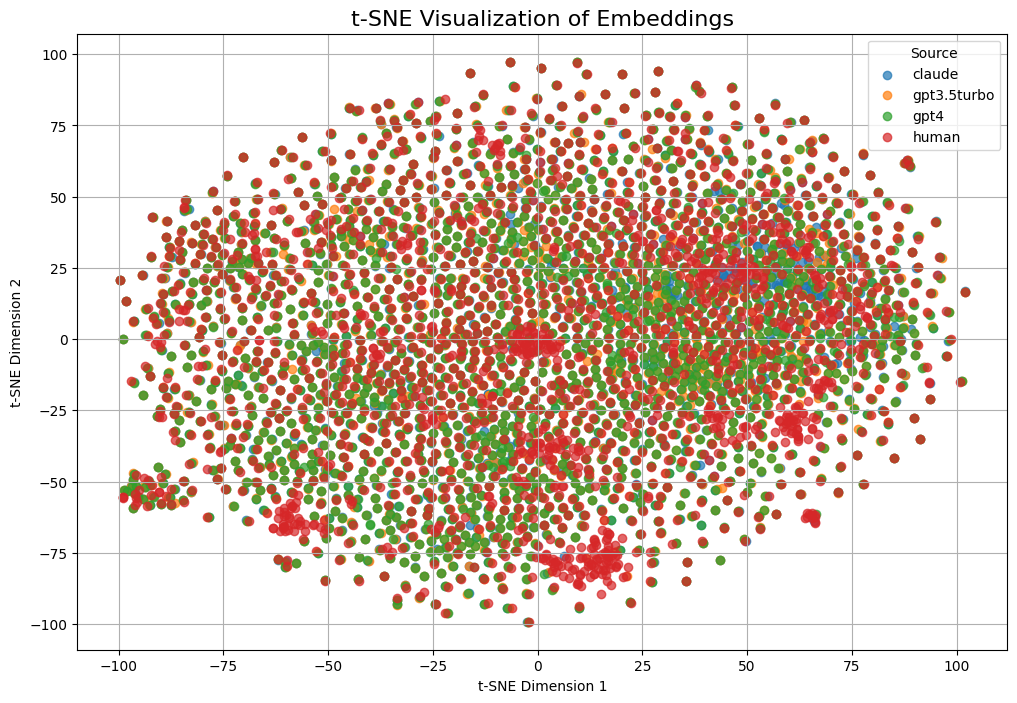

In [ ]:


# Load the embeddings
embeddings_df = pd.read_csv('final2000_embeddings.csv')

# Separate embeddings and labels
X = embeddings_df.iloc[:, 1:1025].values  # Embedding dimensions
y = embeddings_df['source'].values        # Source labels (e.g., human, GPT-3.5, etc.)

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)

# Fit and transform the embeddings
X_embedded = tsne.fit_transform(X)

# Plot the t-SNE results
plt.figure(figsize=(12, 8))
for label in np.unique(y):
    idx = np.where(y == label)
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=label, alpha=0.7)

plt.title("t-SNE Visualization of Embeddings", fontsize=16)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Source")
plt.grid(True)
plt.show()


In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


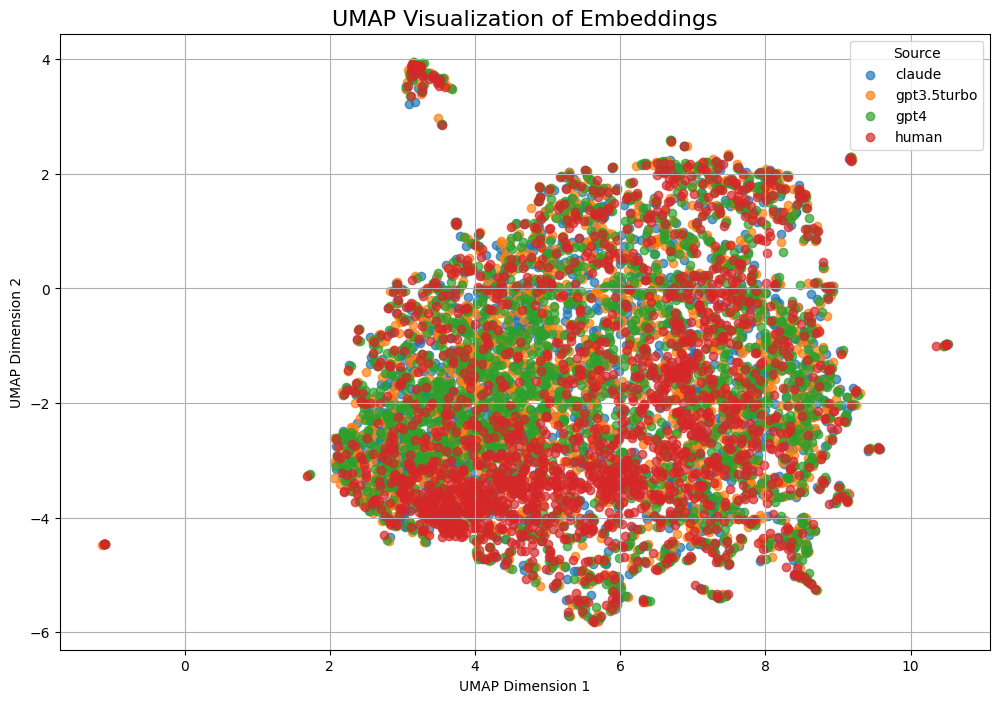

In [ ]:


# Load the embeddings
embeddings_df = pd.read_csv('final2000_embeddings.csv')

# Separate embeddings and labels
X = embeddings_df.iloc[:, 1:1025].values  # Embedding dimensions
y = embeddings_df['source'].values        # Source labels (e.g., human, GPT-3.5, etc.)

# Initialize UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the embeddings
X_umap = umap_reducer.fit_transform(X)

# Plot the UMAP results
plt.figure(figsize=(12, 8))
for label in np.unique(y):
    idx = np.where(y == label)
    plt.scatter(X_umap[idx, 0], X_umap[idx, 1], label=label, alpha=0.7)

plt.title("UMAP Visualization of Embeddings", fontsize=16)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(title="Source")
plt.grid(True)
plt.show()


#Training Standard Classifiers


Training Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      claude       0.90      0.89      0.90       397
 gpt3.5turbo       0.74      0.72      0.73       399
        gpt4       0.77      0.81      0.79       379
       human       0.96      0.94      0.95       425

    accuracy                           0.84      1600
   macro avg       0.84      0.84      0.84      1600
weighted avg       0.84      0.84      0.84      1600


Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

      claude       0.66      0.62      0.64       397
 gpt3.5turbo       0.51      0.50      0.51       399
        gpt4       0.57      0.58      0.58       379
       human       0.83      0.89      0.86       425

    accuracy                           0.65      1600
   macro avg       0.65      0.65      0.65      1600
weighted avg       0.65      0.65      0.65

<Figure size 1200x600 with 0 Axes>

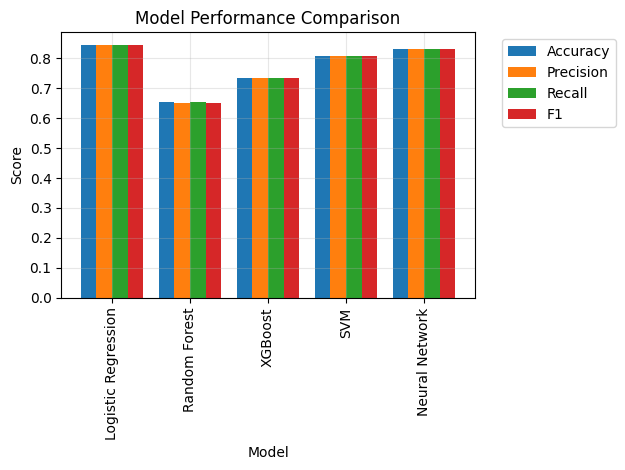

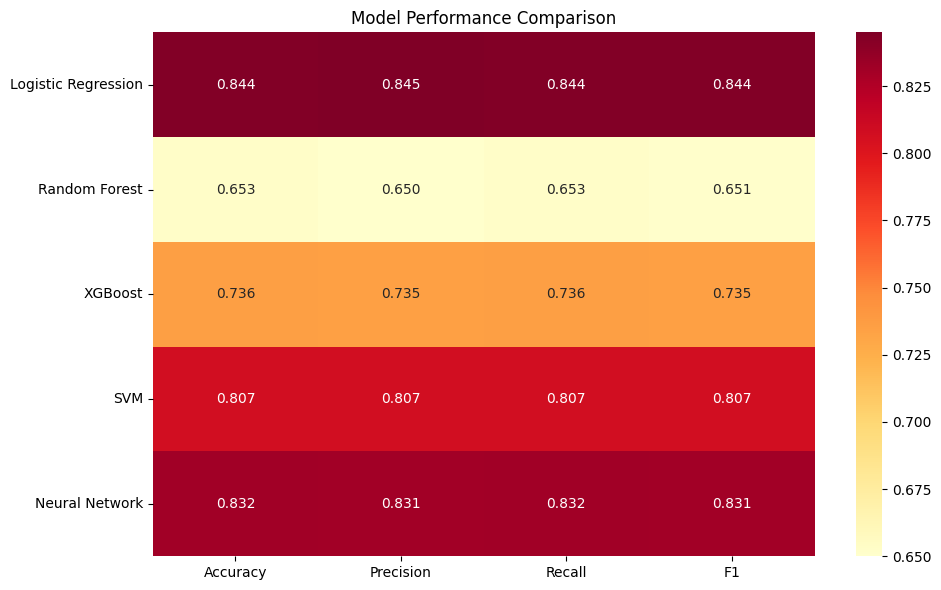


Detailed Results:
                     Accuracy  Precision  Recall     F1
Logistic Regression     0.844      0.845   0.844  0.844
Random Forest           0.653      0.650   0.653  0.651
XGBoost                 0.736      0.735   0.736  0.735
SVM                     0.807      0.807   0.807  0.807
Neural Network          0.832      0.831   0.832  0.831


In [ ]:
# Load embeddings

# Prepare features and labels
X = embeddings_df[[col for col in embeddings_df.columns if col.startswith('dim_')]].values
y = embeddings_df['source'].values

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Removed multi_class parameter
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(objective='multi:softmax', random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(512, 256), max_iter=1000, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Transform predictions back to original labels for reporting
    y_test_original = le.inverse_transform(y_test)
    y_pred_original = le.inverse_transform(y_pred)

    # Get metrics
    accuracy = accuracy_score(y_test_original, y_pred_original)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_original, y_pred_original, average='weighted')

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    }

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test_original, y_pred_original))

# Create visualization
metrics_df = pd.DataFrame(results).T
metrics_df = metrics_df.round(3)

# Plot results
plt.figure(figsize=(12, 6))
metrics_df.plot(kind='bar', width=0.8)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

# Create a heatmap of the results
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.show()

print("\nDetailed Results:")
print(metrics_df)

##Seeing if I can beat log regression with a more complex MLP

In [ ]:


class ComplexMLP(nn.Module):
    def __init__(self, input_dim=1024, num_classes=4):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.3),

            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),

            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),

            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.network(x)

Epoch 1/100:
Train Loss: 0.7193
Val Loss: 0.5225
Val Accuracy: 79.75%
--------------------
Epoch 6/100:
Train Loss: 0.2951
Val Loss: 0.4441
Val Accuracy: 82.88%
--------------------
Epoch 11/100:
Train Loss: 0.1671
Val Loss: 0.4405
Val Accuracy: 85.25%
--------------------
Epoch 16/100:
Train Loss: 0.1031
Val Loss: 0.5148
Val Accuracy: 83.88%
--------------------
Epoch 21/100:
Train Loss: 0.0696
Val Loss: 0.5066
Val Accuracy: 85.69%
--------------------
Epoch 26/100:
Train Loss: 0.0332
Val Loss: 0.5712
Val Accuracy: 85.50%
--------------------
Epoch 31/100:
Train Loss: 0.0321
Val Loss: 0.5804
Val Accuracy: 85.44%
--------------------
Epoch 36/100:
Train Loss: 0.0261
Val Loss: 0.6058
Val Accuracy: 86.00%
--------------------
Epoch 41/100:
Train Loss: 0.0150
Val Loss: 0.6054
Val Accuracy: 85.25%
--------------------
Epoch 46/100:
Train Loss: 0.0183
Val Loss: 0.5986
Val Accuracy: 85.75%
--------------------
Epoch 51/100:
Train Loss: 0.0215
Val Loss: 0.6224
Val Accuracy: 86.00%
-----------

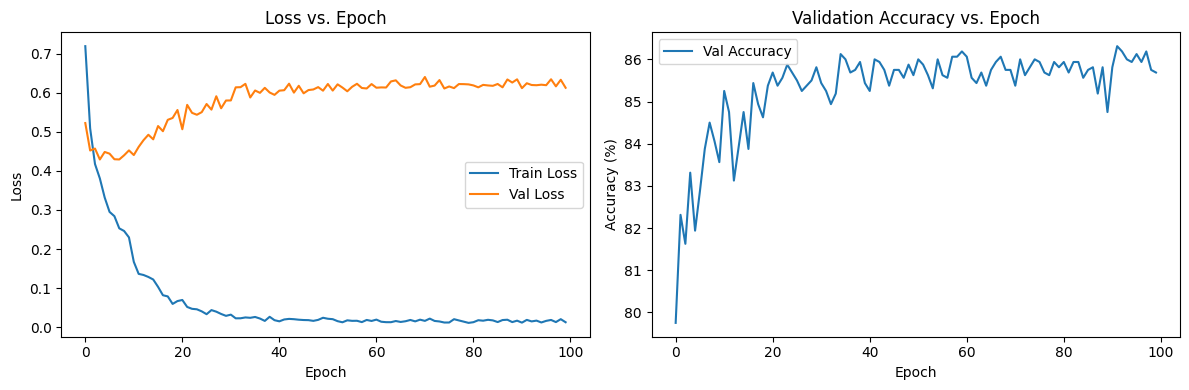

In [ ]:

# Custom dataset
class EmbeddingDataset(Dataset):
   def __init__(self, embeddings, labels):
       self.embeddings = torch.FloatTensor(embeddings)
       self.labels = torch.LongTensor(labels)

   def __len__(self):
       return len(self.labels)

   def __getitem__(self, idx):
       return self.embeddings[idx], self.labels[idx]

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=100, device='cuda'):
   train_losses = []
   val_losses = []
   val_accuracies = []
   best_val_acc = 0
   best_model = None

   for epoch in range(num_epochs):
       # Training phase
       model.train()
       running_loss = 0.0

       for embeddings, labels in train_loader:
           embeddings, labels = embeddings.to(device), labels.to(device)

           optimizer.zero_grad()
           outputs = model(embeddings)
           loss = criterion(outputs, labels)
           loss.backward()
           optimizer.step()

           running_loss += loss.item()

       epoch_train_loss = running_loss / len(train_loader)
       train_losses.append(epoch_train_loss)

       # Validation phase
       model.eval()
       running_val_loss = 0.0
       correct = 0
       total = 0

       with torch.no_grad():
           for embeddings, labels in val_loader:
               embeddings, labels = embeddings.to(device), labels.to(device)
               outputs = model(embeddings)
               loss = criterion(outputs, labels)
               running_val_loss += loss.item()

               _, predicted = torch.max(outputs.data, 1)
               total += labels.size(0)
               correct += (predicted == labels).sum().item()

       epoch_val_loss = running_val_loss / len(val_loader)
       val_losses.append(epoch_val_loss)

       val_accuracy = 100 * correct / total
       val_accuracies.append(val_accuracy)

       # Save best model
       if val_accuracy > best_val_acc:
           best_val_acc = val_accuracy
           best_model = model.state_dict()

       # Learning rate scheduling
       scheduler.step(epoch_val_loss)

       if epoch % 5 == 0:
           print(f'Epoch {epoch+1}/{num_epochs}:')
           print(f'Train Loss: {epoch_train_loss:.4f}')
           print(f'Val Loss: {epoch_val_loss:.4f}')
           print(f'Val Accuracy: {val_accuracy:.2f}%')
           print('--------------------')

   return best_model, train_losses, val_losses, val_accuracies

# Prepare data and train
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create datasets
train_dataset = EmbeddingDataset(X_train_scaled, y_train)
val_dataset = EmbeddingDataset(X_test_scaled, y_test)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Initialize model and training components
model = ComplexMLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

# Train the model
best_model, train_losses, val_losses, val_accuracies = train_model(
   model, train_loader, val_loader, criterion, optimizer, scheduler
)

# Load best model and evaluate
model.load_state_dict(best_model)
model.eval()

# Get predictions on test set
all_preds = []
all_labels = []

with torch.no_grad():
   for embeddings, labels in val_loader:
       embeddings = embeddings.to(device)
       outputs = model(embeddings)
       _, predicted = torch.max(outputs.data, 1)
       all_preds.extend(predicted.cpu().numpy())
       all_labels.extend(labels.numpy())

# Print classification report
print("\nFinal Classification Report:")
print(classification_report(all_labels, all_preds,
                         target_names=['claude', 'gpt3.5turbo', 'gpt4', 'human']))

# Plot training curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Val Accuracy')
plt.title('Validation Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# saving components
torch.save({
    'model_state_dict': best_model,
    'class_names': le.classes_,
    'scaler': scaler,
}, 'complex_mlp_checkpoint.pt')

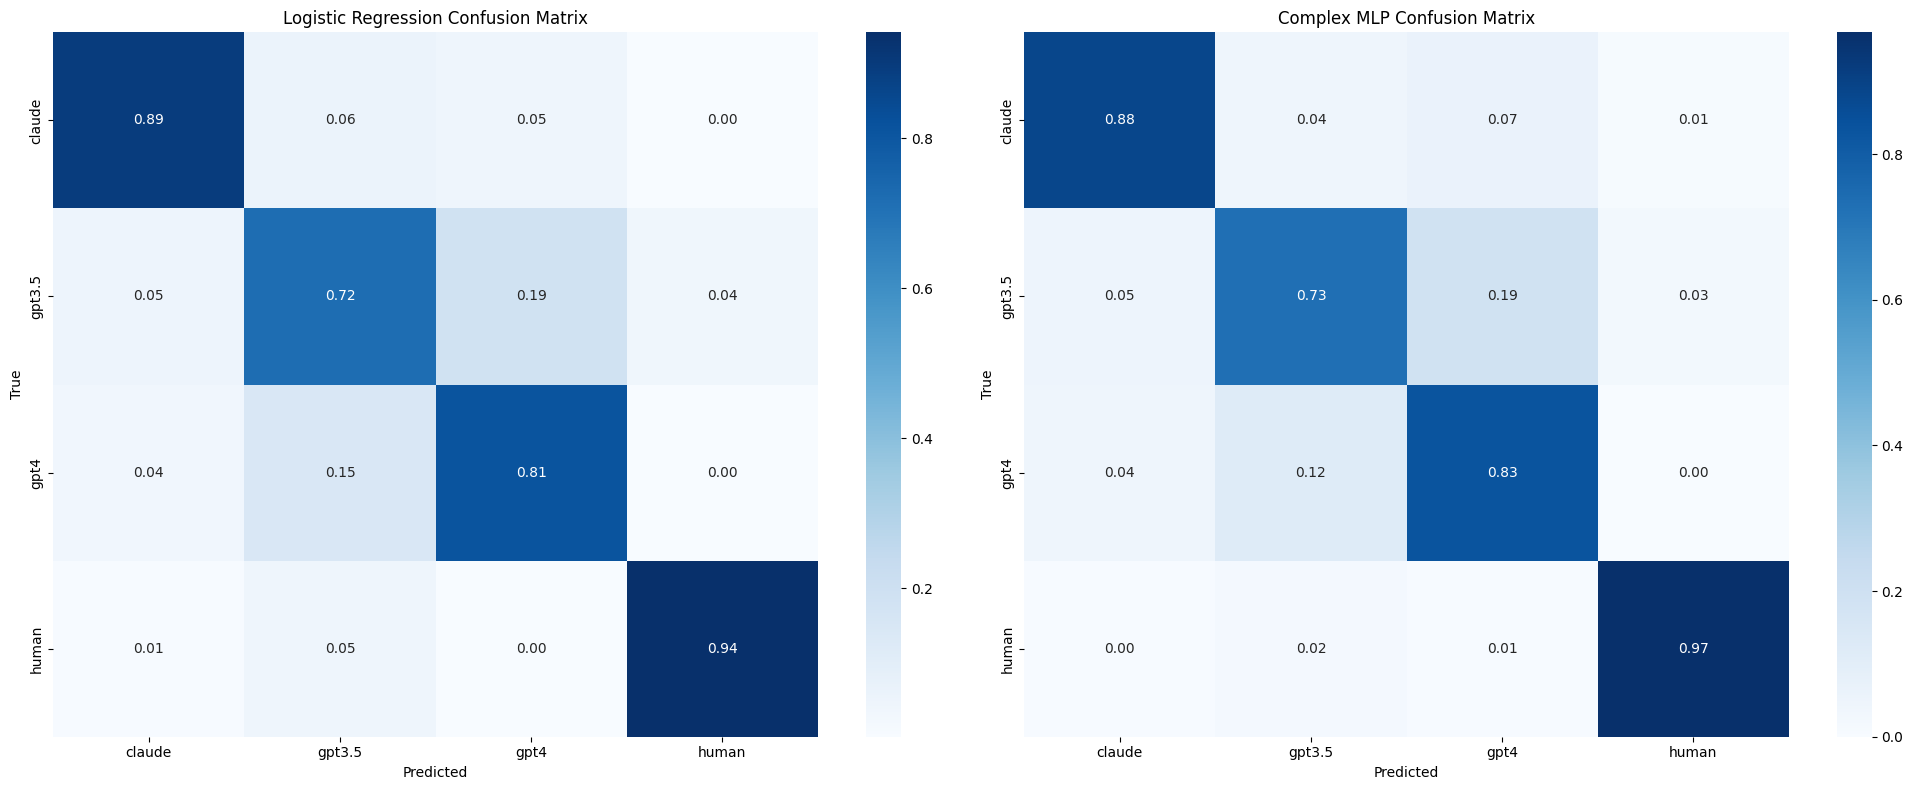

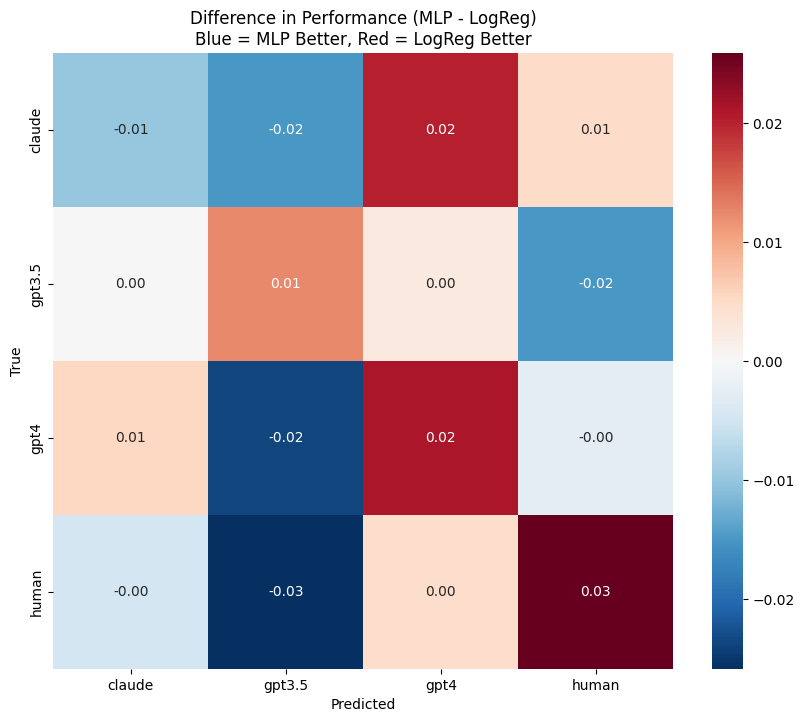


Positive values indicate where MLP performed better than Logistic Regression
Negative values indicate where Logistic Regression performed better than MLP


In [ ]:
# First, run logistic regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Convert predictions back to original labels
y_test_original_lr = le.inverse_transform(y_test)
y_pred_original_lr = le.inverse_transform(lr_pred)

def plot_confusion_matrices(y_test_lr, y_pred_lr, y_test_mlp, y_pred_mlp):
    """
    Plot confusion matrices for both models side by side
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Logistic Regression confusion matrix
    cm_lr = confusion_matrix(y_test_lr, y_pred_lr)
    cm_lr_norm = cm_lr.astype('float') / cm_lr.sum(axis=1)[:, np.newaxis]

    sns.heatmap(cm_lr_norm,
                annot=True,
                fmt='.2f',
                cmap='Blues',
                xticklabels=['claude', 'gpt3.5', 'gpt4', 'human'],
                yticklabels=['claude', 'gpt3.5', 'gpt4', 'human'],
                ax=ax1)
    ax1.set_title('Logistic Regression Confusion Matrix')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('True')

    # MLP confusion matrix
    cm_mlp = confusion_matrix(y_test_mlp, y_pred_mlp)
    cm_mlp_norm = cm_mlp.astype('float') / cm_mlp.sum(axis=1)[:, np.newaxis]

    sns.heatmap(cm_mlp_norm,
                annot=True,
                fmt='.2f',
                cmap='Blues',
                xticklabels=['claude', 'gpt3.5', 'gpt4', 'human'],
                yticklabels=['claude', 'gpt3.5', 'gpt4', 'human'],
                ax=ax2)
    ax2.set_title('Complex MLP Confusion Matrix')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('True')

    plt.tight_layout()

    # Calculate and return differences
    diff = cm_mlp_norm - cm_lr_norm
    return diff

# Plot matrices and get differences
diff = plot_confusion_matrices(y_test_original_lr, y_pred_original_lr,
                             all_labels, all_preds)

# Show improvement/decline in classification
plt.figure(figsize=(10, 8))
sns.heatmap(diff,
            annot=True,
            fmt='.2f',
            cmap='RdBu_r',  # Red for decline, Blue for improvement
            center=0,
            xticklabels=['claude', 'gpt3.5', 'gpt4', 'human'],
            yticklabels=['claude', 'gpt3.5', 'gpt4', 'human'])
plt.title('Difference in Performance (MLP - LogReg)\nBlue = MLP Better, Red = LogReg Better')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nPositive values indicate where MLP performed better than Logistic Regression")
print("Negative values indicate where Logistic Regression performed better than MLP")

#How much text do we need for the basic approach?


Processing 100 tokens...
Generating embeddings for human texts with 100 tokens...


100%|██████████| 63/63 [00:08<00:00,  7.65it/s]


Generating embeddings for gpt4 texts with 100 tokens...


100%|██████████| 63/63 [00:08<00:00,  7.66it/s]


Generating embeddings for claude texts with 100 tokens...


100%|██████████| 63/63 [00:08<00:00,  7.70it/s]


Generating embeddings for gpt3.5turbo texts with 100 tokens...


100%|██████████| 63/63 [00:08<00:00,  7.71it/s]



Classification Report for 100 tokens:
              precision    recall  f1-score   support

      claude       0.78      0.80      0.79       397
 gpt3.5turbo       0.62      0.59      0.61       399
        gpt4       0.66      0.65      0.65       379
       human       0.88      0.90      0.89       425

    accuracy                           0.74      1600
   macro avg       0.73      0.74      0.73      1600
weighted avg       0.74      0.74      0.74      1600


Processing 75 tokens...
Generating embeddings for human texts with 75 tokens...


100%|██████████| 63/63 [00:06<00:00,  9.45it/s]


Generating embeddings for gpt4 texts with 75 tokens...


100%|██████████| 63/63 [00:06<00:00,  9.53it/s]


Generating embeddings for claude texts with 75 tokens...


100%|██████████| 63/63 [00:06<00:00,  9.54it/s]


Generating embeddings for gpt3.5turbo texts with 75 tokens...


100%|██████████| 63/63 [00:06<00:00,  9.58it/s]



Classification Report for 75 tokens:
              precision    recall  f1-score   support

      claude       0.71      0.76      0.74       397
 gpt3.5turbo       0.56      0.56      0.56       399
        gpt4       0.61      0.57      0.59       379
       human       0.83      0.82      0.83       425

    accuracy                           0.68      1600
   macro avg       0.68      0.68      0.68      1600
weighted avg       0.68      0.68      0.68      1600


Processing 50 tokens...
Generating embeddings for human texts with 50 tokens...


100%|██████████| 63/63 [00:04<00:00, 13.88it/s]


Generating embeddings for gpt4 texts with 50 tokens...


100%|██████████| 63/63 [00:04<00:00, 13.87it/s]


Generating embeddings for claude texts with 50 tokens...


100%|██████████| 63/63 [00:04<00:00, 14.00it/s]


Generating embeddings for gpt3.5turbo texts with 50 tokens...


100%|██████████| 63/63 [00:04<00:00, 14.05it/s]



Classification Report for 50 tokens:
              precision    recall  f1-score   support

      claude       0.60      0.65      0.62       397
 gpt3.5turbo       0.51      0.48      0.50       399
        gpt4       0.51      0.49      0.50       379
       human       0.76      0.78      0.77       425

    accuracy                           0.60      1600
   macro avg       0.60      0.60      0.60      1600
weighted avg       0.60      0.60      0.60      1600


Processing 25 tokens...
Generating embeddings for human texts with 25 tokens...


100%|██████████| 63/63 [00:02<00:00, 24.25it/s]


Generating embeddings for gpt4 texts with 25 tokens...


100%|██████████| 63/63 [00:02<00:00, 24.55it/s]


Generating embeddings for claude texts with 25 tokens...


100%|██████████| 63/63 [00:02<00:00, 24.83it/s]


Generating embeddings for gpt3.5turbo texts with 25 tokens...


100%|██████████| 63/63 [00:02<00:00, 24.96it/s]



Classification Report for 25 tokens:
              precision    recall  f1-score   support

      claude       0.51      0.48      0.49       397
 gpt3.5turbo       0.43      0.44      0.43       399
        gpt4       0.45      0.47      0.46       379
       human       0.65      0.65      0.65       425

    accuracy                           0.51      1600
   macro avg       0.51      0.51      0.51      1600
weighted avg       0.51      0.51      0.51      1600


Processing 10 tokens...
Generating embeddings for human texts with 10 tokens...


100%|██████████| 63/63 [00:01<00:00, 42.07it/s]


Generating embeddings for gpt4 texts with 10 tokens...


100%|██████████| 63/63 [00:01<00:00, 43.10it/s]


Generating embeddings for claude texts with 10 tokens...


100%|██████████| 63/63 [00:01<00:00, 42.87it/s]


Generating embeddings for gpt3.5turbo texts with 10 tokens...


100%|██████████| 63/63 [00:01<00:00, 42.95it/s]



Classification Report for 10 tokens:
              precision    recall  f1-score   support

      claude       0.37      0.35      0.36       397
 gpt3.5turbo       0.35      0.36      0.35       399
        gpt4       0.33      0.36      0.34       379
       human       0.46      0.45      0.45       425

    accuracy                           0.38      1600
   macro avg       0.38      0.38      0.38      1600
weighted avg       0.38      0.38      0.38      1600


Processing 5 tokens...
Generating embeddings for human texts with 5 tokens...


100%|██████████| 63/63 [00:01<00:00, 43.86it/s]


Generating embeddings for gpt4 texts with 5 tokens...


100%|██████████| 63/63 [00:01<00:00, 43.66it/s]


Generating embeddings for claude texts with 5 tokens...


100%|██████████| 63/63 [00:01<00:00, 44.41it/s]


Generating embeddings for gpt3.5turbo texts with 5 tokens...


100%|██████████| 63/63 [00:01<00:00, 44.79it/s]



Classification Report for 5 tokens:
              precision    recall  f1-score   support

      claude       0.38      0.38      0.38       397
 gpt3.5turbo       0.35      0.40      0.37       399
        gpt4       0.28      0.27      0.28       379
       human       0.42      0.36      0.39       425

    accuracy                           0.35      1600
   macro avg       0.36      0.35      0.35      1600
weighted avg       0.36      0.35      0.36      1600


Processing 3 tokens...
Generating embeddings for human texts with 3 tokens...


100%|██████████| 63/63 [00:01<00:00, 34.55it/s]


Generating embeddings for gpt4 texts with 3 tokens...


100%|██████████| 63/63 [00:01<00:00, 35.57it/s]


Generating embeddings for claude texts with 3 tokens...


100%|██████████| 63/63 [00:01<00:00, 36.28it/s]


Generating embeddings for gpt3.5turbo texts with 3 tokens...


100%|██████████| 63/63 [00:01<00:00, 36.92it/s]



Classification Report for 3 tokens:
              precision    recall  f1-score   support

      claude       0.37      0.45      0.41       397
 gpt3.5turbo       0.30      0.43      0.36       399
        gpt4       0.22      0.20      0.21       379
       human       0.35      0.17      0.23       425

    accuracy                           0.31      1600
   macro avg       0.31      0.31      0.30      1600
weighted avg       0.31      0.31      0.30      1600



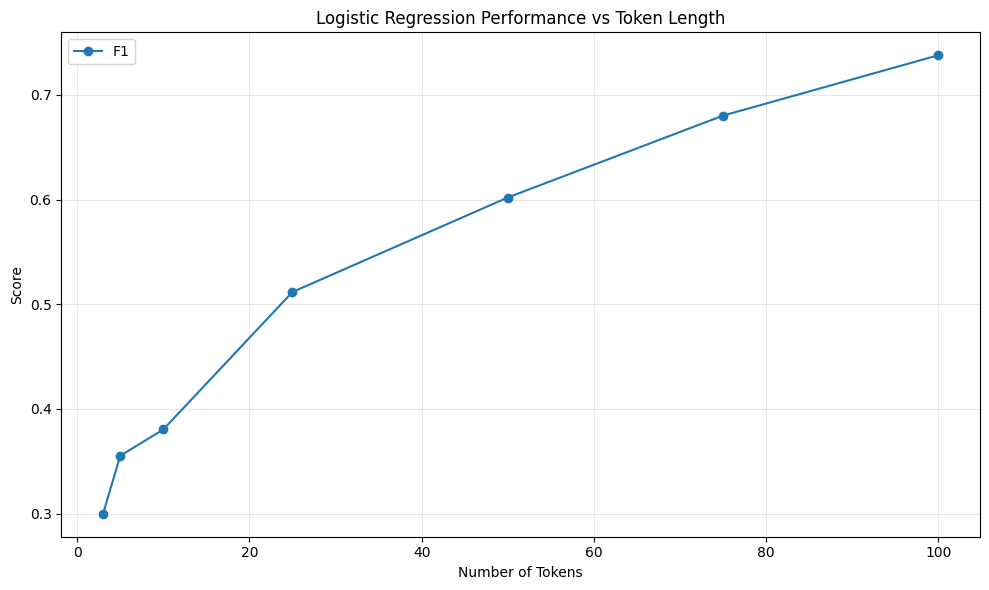


Detailed Results:
     Accuracy  Precision  Recall     F1
100     0.739      0.737   0.739  0.738
75      0.681      0.680   0.681  0.680
50      0.604      0.601   0.604  0.602
25      0.511      0.513   0.511  0.512
10      0.380      0.381   0.380  0.380
5       0.355      0.358   0.355  0.355
3       0.312      0.312   0.312  0.300


In [ ]:
def mean_pooling(model_output, attention_mask):
    """
    Perform mean pooling on token embeddings.
    Using mean pooling instead of just [CLS] token as it often performs better.
    """
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def prepare_data_with_token_limit(df, token_limit, batch_size=32):
    """
    Create embeddings using BERT-large with token length control.

    Args:
        df: DataFrame containing the review texts
        token_limit: Maximum number of tokens to use
        batch_size: Number of texts to process at once
    """
    tokenizer = AutoTokenizer.from_pretrained('bert-large-uncased')
    model = AutoModel.from_pretrained('bert-large-uncased')

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    texts = {
        'human': df['original_review'].tolist(),
        'gpt4': df['generated_gpt-4o-mini'].tolist(),
        'claude': df['generated_claude-3-5-sonnet-20241022'].tolist(),
        'gpt3.5turbo': df['generated_gpt-3.5-turbo-1106'].tolist(),
    }

    embeddings = {}
    labels = []
    all_embeddings = []

    for label, text_list in texts.items():
        print(f"Generating embeddings for {label} texts with {token_limit} tokens...")
        text_embeddings = []

        for i in tqdm(range(0, len(text_list), batch_size)):
            batch_texts = text_list[i:i + batch_size]
            batch_texts = [str(text) if text is not None else "" for text in batch_texts]

            # Tokenize with specified limit
            encoded_input = tokenizer(
                batch_texts,
                padding=True,
                truncation=True,
                max_length=token_limit,  # Use specified token limit
                return_tensors='pt'
            )

            encoded_input = {k: v.to(device) for k, v in encoded_input.items()}

            with torch.no_grad():
                model_output = model(**encoded_input)

            batch_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
            text_embeddings.append(batch_embeddings.cpu().numpy())

        emb = np.vstack(text_embeddings)
        embeddings[label] = emb
        all_embeddings.append(emb)
        labels.extend([label] * len(text_list))

    X = np.vstack(all_embeddings)
    return X, labels, embeddings

def run_token_length_experiment(df, token_lengths=[100, 75, 50, 25]):
    """
    Run logistic regression experiments with different token lengths.
    """
    results = {}

    for token_limit in token_lengths:
        print(f"\nProcessing {token_limit} tokens...")

        # Get embeddings with token limit
        X, y, _ = prepare_data_with_token_limit(df, token_limit)

        # Encode labels
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)

        # Split and scale data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_encoded, test_size=0.2, random_state=42
        )

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train logistic regression
        lr = LogisticRegression(max_iter=1000)
        lr.fit(X_train_scaled, y_train)

        # Get predictions
        y_pred = lr.predict(X_test_scaled)

        # Calculate metrics
        y_test_original = le.inverse_transform(y_test)
        y_pred_original = le.inverse_transform(y_pred)

        accuracy = accuracy_score(y_test_original, y_pred_original)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_test_original, y_pred_original, average='weighted'
        )

        results[token_limit] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        }

        print(f"\nClassification Report for {token_limit} tokens:")
        print(classification_report(y_test_original, y_pred_original))

    # Create visualization
    results_df = pd.DataFrame(results).T

    plt.figure(figsize=(10, 6))
    for metric in ['F1']:
        plt.plot(results_df.index, results_df[metric], marker='o', label=metric)

    plt.title('Logistic Regression Performance vs Token Length')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return results_df

# Run experiment
token_lengths = [100, 75, 50, 25, 10, 5, 3]
results_df = run_token_length_experiment(df, token_lengths)
print("\nDetailed Results:")
print(results_df.round(3))

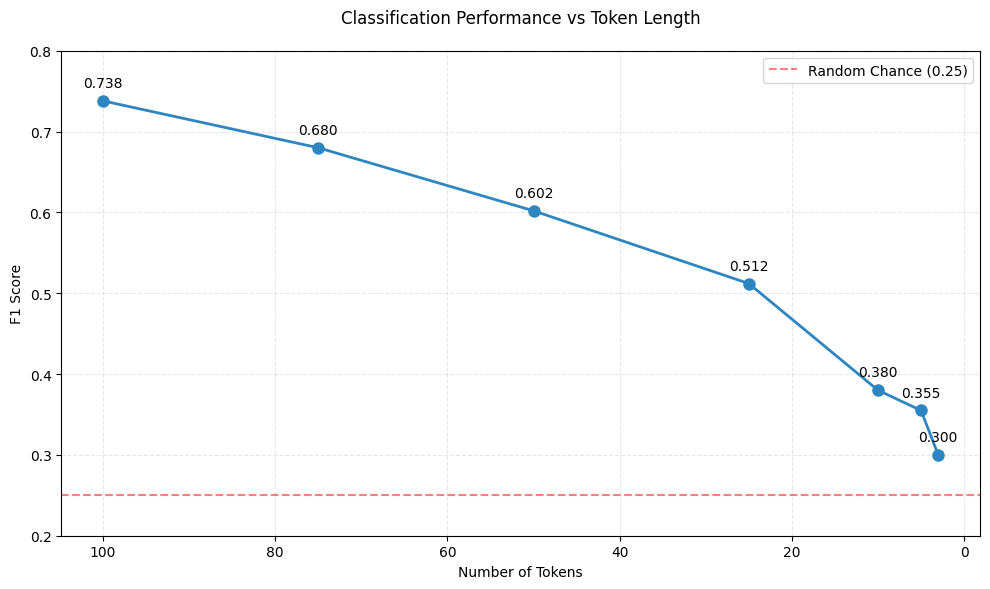

In [ ]:
def plot_token_performance():
    # Data
    tokens = [100, 75, 50, 25, 10, 5, 3]
    f1_scores = [0.738, 0.680, 0.602, 0.512, 0.380, 0.355, 0.300]

    # Create figure
    plt.figure(figsize=(10, 6))

    # Plot the line
    plt.plot(tokens, f1_scores, marker='o', linewidth=2, markersize=8,
             color='#2E86C1', zorder=3)

    # Add point labels
    for x, y in zip(tokens, f1_scores):
        plt.annotate(f'{y:.3f}',
                    (x, y),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center')

    # Add a horizontal line at 0.25 (random chance)
    plt.axhline(y=0.25, color='red', linestyle='--', alpha=0.5,
                label='Random Chance (0.25)', zorder=2)

    # Customize the plot
    plt.title('Classification Performance vs Token Length', pad=20)
    plt.xlabel('Number of Tokens')
    plt.ylabel('F1 Score')
    plt.grid(True, linestyle='--', alpha=0.3, zorder=1)

    # Set y-axis limits to focus on the relevant range
    plt.ylim(0.2, 0.8)

    # Reverse x-axis to show performance degradation left-to-right
    plt.gca().invert_xaxis()

    plt.legend()
    plt.tight_layout()

    return plt

# Create the plot
plot_token_performance()
plt.show()

##Making a simple Stream Lit app with a lightweight log reg classifier to start

In [ ]:


# Load embeddings and prepare data (your existing code)
X = embeddings_df[[col for col in embeddings_df.columns if col.startswith('dim_')]].values
y = embeddings_df['source'].values

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train just the logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Save the model, scaler, and label encoder
pickle.dump(lr_model, open('logistic_regression_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(le, open('label_encoder.pkl', 'wb'))

# Verify the saved model's performance
y_pred = lr_model.predict(X_test_scaled)
print("\nLogistic Regression Classification Report:")
print(classification_report(le.inverse_transform(y_test),
                          le.inverse_transform(y_pred)))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

      claude       0.90      0.89      0.90       397
 gpt3.5turbo       0.74      0.72      0.73       399
        gpt4       0.77      0.81      0.79       379
       human       0.96      0.94      0.95       425

    accuracy                           0.84      1600
   macro avg       0.84      0.84      0.84      1600
weighted avg       0.84      0.84      0.84      1600



In [ ]:



# Your existing helper functions
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def get_embedding(text, model, tokenizer):
    encoded_input = tokenizer(
        text,
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors='pt'
    )

    with torch.no_grad():
        model_output = model(**encoded_input)

    embedding = mean_pooling(model_output, encoded_input['attention_mask'])
    return embedding.numpy()

# Load models
tokenizer = AutoTokenizer.from_pretrained('bert-large-uncased')
model = AutoModel.from_pretrained('bert-large-uncased')
lr_model = pickle.load(open('logistic_regression_model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))
le = pickle.load(open('label_encoder.pkl', 'rb'))

def predict_source(text):
    # Get embedding
    embedding = get_embedding(text, model, tokenizer)

    # Scale the embedding
    scaled_embedding = scaler.transform(embedding)

    # Get prediction probabilities
    probabilities = lr_model.predict_proba(scaled_embedding)[0]

    # Format results
    results = {}
    for class_name, prob in zip(le.inverse_transform(range(len(probabilities))), probabilities):
        results[class_name] = float(prob)

    return results

# Create Gradio interface
interface = gr.Interface(
    fn=predict_source,
    inputs=gr.Textbox(lines=5, label="Enter a movie review (max 300 words):"),
    outputs=gr.Label(label="Source Probabilities"),
    title="LLM Text Detector",
    description="Detect whether a movie review was written by a human or specific LLM models."
)

interface.launch(share=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://007b61c21cbbc4ef6e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Now I'll use my "Complex" MLP for the front-end

In [ ]:
class_names = np.array(['claude', 'gpt3.5turbo', 'gpt4', 'human'])  # Make sure this matches your training order
torch.save(model.state_dict(), 'complex_mlp_weights.pt')
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(class_names, open('class_names.pkl', 'wb'))

In [ ]:


def get_embedding(text, model, tokenizer):
    """
    Generate BERT embedding for input text.
    """
    # Tokenize texts
    encoded_input = tokenizer(
        text,
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors='pt'
    )

    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)

    # Perform mean pooling
    attention_mask = encoded_input['attention_mask']
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    embedding = torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

    return embedding.numpy()

class ComplexMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(1024, 1024),  # First layer is bigger
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.3),

            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),

            nn.Linear(128, 4)  # Output layer
        )

    def forward(self, x):
        return self.network(x)
# Load models and components
tokenizer = AutoTokenizer.from_pretrained('bert-large-uncased')
bert_model = AutoModel.from_pretrained('bert-large-uncased')

# Load the saved components
model = ComplexMLP()
model.load_state_dict(torch.load('complex_mlp_weights.pt'))
model.eval()

scaler = pickle.load(open('scaler.pkl', 'rb'))
class_names = pickle.load(open('class_names.pkl', 'rb'))

def predict_source(text):
    try:
        print("Getting embedding...")
        # Get embedding
        embedding = get_embedding(text, bert_model, tokenizer)
        print("Embedding shape:", embedding.shape)

        print("Scaling embedding...")
        # Scale the embedding
        scaled_embedding = scaler.transform(embedding)
        print("Scaled embedding shape:", scaled_embedding.shape)

        print("Converting to tensor...")
        # Convert to torch tensor
        input_tensor = torch.FloatTensor(scaled_embedding)
        print("Input tensor shape:", input_tensor.shape)

        print("Getting prediction...")
        # Get prediction
        with torch.no_grad():
            outputs = model(input_tensor)
            probabilities = torch.nn.functional.softmax(outputs, dim=1).numpy()[0]

        print("Computing probabilities...")
        # Combine GPT probabilities and add confidence threshold
        combined_probs = {
            'Human': float(probabilities[np.where(class_names == 'human')[0][0]]),
            'ChatGPT': float(probabilities[np.where(class_names == 'gpt3.5turbo')[0][0]] +
                           probabilities[np.where(class_names == 'gpt4')[0][0]]),
            'Claude': float(probabilities[np.where(class_names == 'claude')[0][0]])
        }

        print("Final probabilities:", combined_probs)

        # Add confidence thresholding
        max_prob = max(combined_probs.values())
        if max_prob < 0.7:
            return {'Unsure': 1.0}

        return combined_probs

    except Exception as e:
        print("Error occurred:", str(e))
        return {'Error': str(e)}

# Create Gradio interface
interface = gr.Interface(
    fn=predict_source,
    inputs=gr.Textbox(lines=5, label="Enter text to analyze:"),
    outputs=gr.Label(label="Source Probabilities"),
    title="LLM Movie Review Detector",
    description="Detect whether a movie review was written by a human, ChatGPT, or Claude. Returns 'Unsure' when confidence is low."
)

interface.launch(share=True)

<ipython-input-29-4c876bd74dfa>:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('complex_mlp_weights.pt'))


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7d446c544054195bd2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


##Deploying to Hugging Face spaces

In [ ]:
!git clone https://huggingface.co/spaces/datboyalex/LLM_movie_review_detector

Cloning into 'LLM_movie_review_detector'...
remote: Enumerating objects: 4, done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 4 (from 1)
Unpacking objects: 100% (4/4), 1.34 KiB | 47.00 KiB/s, done.


In [ ]:
%%writefile requirements.txt
torch
transformers
gradio
numpy
scikit-learn

Writing requirements.txt


In [ ]:
%cd /content
!git clone https://huggingface.co/spaces/datboyalex/LLM_movie_review_detector

/content
Cloning into 'LLM_movie_review_detector'...
remote: Enumerating objects: 4, done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 4 (from 1)
Unpacking objects: 100% (4/4), 1.34 KiB | 1.34 MiB/s, done.


In [ ]:
!ls

drive  LLM_movie_review_detector  sample_data


In [ ]:
%cd LLM_movie_review_detector

In [ ]:
os.chdir('/content/drive/MyDrive/llms_final_project/LLM_movie_review_detector')
os.listdir()

['complex_mlp_checkpoint.pt',
 'complex_mlp_weights.pt',
 'scaler.pkl',
 'class_names.pkl',
 '.git',
 '.gitattributes',
 'README.md',
 'requirements.txt']

In [ ]:
%%writefile /content/LLM_movie_review_detector/app.py



In [ ]:
code = """
import gradio as gr
import torch
import torch.nn as nn
import numpy as np
from transformers import AutoTokenizer, AutoModel
import pickle

# Function to generate BERT embedding for input text
def get_embedding(text, model, tokenizer):
    encoded_input = tokenizer(
        text,
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors='pt'
    )
    with torch.no_grad():
        model_output = model(**encoded_input)

    attention_mask = encoded_input['attention_mask']
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    embedding = torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

    return embedding.numpy()

# Define the MLP model architecture
class ComplexMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 4)
        )

    def forward(self, x):
        return self.network(x)

# Load the BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('bert-large-uncased')
bert_model = AutoModel.from_pretrained('bert-large-uncased')

# Load the saved components
model = ComplexMLP()
model.load_state_dict(torch.load('complex_mlp_weights.pt', map_location=torch.device('cpu')))
model.eval()

scaler = pickle.load(open('scaler.pkl', 'rb'))
class_names = pickle.load(open('class_names.pkl', 'rb'))

# Prediction function
def predict_source(text):
    try:
        embedding = get_embedding(text, bert_model, tokenizer)
        scaled_embedding = scaler.transform(embedding)
        input_tensor = torch.FloatTensor(scaled_embedding)

        with torch.no_grad():
            outputs = model(input_tensor)
            probabilities = torch.nn.functional.softmax(outputs, dim=1).numpy()[0]

        combined_probs = {
            'Human': float(probabilities[np.where(class_names == 'human')[0][0]]),
            'ChatGPT': float(probabilities[np.where(class_names == 'gpt3.5turbo')[0][0]] +
                           probabilities[np.where(class_names == 'gpt4')[0][0]]),
            'Claude': float(probabilities[np.where(class_names == 'claude')[0][0]])
        }

        max_prob = max(combined_probs.values())
        if max_prob < 0.7:
            return {'Unsure': 1.0}

        return combined_probs

    except Exception as e:
        return {'Error': str(e)}

# Gradio Interface
interface = gr.Interface(
    fn=predict_source,
    inputs=gr.Textbox(lines=5, label="Enter text to analyze:"),
    outputs=gr.Label(label="Source Probabilities"),
    title="LLM Movie Review Detector",
    description="Detect whether a movie review was written by a human, ChatGPT, or Claude. Returns 'Unsure' when confidence is low."
)

if __name__ == "__main__":
    interface.launch(server_name="0.0.0.0", server_port=7864, share=True)

"""

# Write the code to a .py file
with open('/content/drive/MyDrive/llms_final_project/LLM_movie_review_detector/script.py', 'w') as f:
    f.write(code)

print("Script saved!")


Script saved!


In [ ]:
#testing python
!python /content/drive/MyDrive/llms_final_project/LLM_movie_review_detector/script.py


2024-12-08 20:58:56.303820: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-08 20:58:56.325301: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-08 20:58:56.331661: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-08 20:58:57.641588: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/content/drive/MyDrive/llms_final_project/LLM_movie_review_detector/script.py:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possibl